In [3]:
import numpy as np
import astropy as astropy
from astropy.table import QTable
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import units as u
import matplotlib.pyplot as plt
from astropy import constants as const
import lmfit
import matplotlib as mpl
from astropy.io import fits
import tabulate
import pandas as pd
from lmfit import Parameters 

In [2]:
mask_array = fits.open('dendrogram_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_02-02-20.fits')
data_mask = mask_array[0].data
header_mask = mask_array[0].header

In [3]:
image_8um = fits.open('mosaic_8um_reprojected_to_500um.fits')
data_8um = image_8um[0].data
header_8um = image_8um[0].header

image_24um = fits.open('mosaic_24um_reprojected_to_500um.fits')
data_24um = image_24um[0].data
header_24um = image_24um[0].header

image_25um = fits.open('mosaic_25um_reprojected_to_500um.fits')
data_25um = image_25um[0].data
header_25um = image_25um[0].header

image_37um = fits.open('mosaic_37um_reprojected_to_500um.fits')
data_37um = image_37um[0].data
header_37um = image_37um[0].header

image_70um = fits.open('mosaic_70um_reprojected_to_500um.fits')
data_70um = image_70um[0].data
header_70um = image_70um[0].header

image_160um = fits.open('mosaic_160um_reprojected_to_500um.fits')
data_160um = image_160um[0].data
header_160um = image_160um[0].header

image_250um = fits.open('mosaic_250um_reprojected_to_500um.fits')
data_250um = image_250um[0].data
header_250um = image_250um[0].header

image_500um = fits.open('mosaic_500um_reprojected_to_500um.fits')
data_500um = image_500um[0].data
header_500um = image_500um[0].header

In [4]:
# Code below is for the mask Stuff

In [4]:
from astropy.table import Table 
from astropy.table import hstack
from astropy.table import Column
catalog = Table.read('megacatalog_team_acc_final_say.fits')

In [5]:
# Some useful constants
h       = const.h.to(u.erg * u.s).value
k       = const.k_B.to(u.erg / u.K).value
c       = const.c.to(u.cm / u.s).value
mmp     = 2.8
mh      = const.m_p.to(u.g).value

G = 6.67408e-11
msun = 1.989e33
mh = 1.6737236e-27
pc2cm = 3.08567758e18
as2persr = 4.25e10 
percm2perm = 1.0e6
hplanck = 6.63e-34
clight = 2.99792e8
kboltzmann = 1.381e-23
sin1yr = 3.15569e7



In [6]:
def blackbody_freq_C(freq, T_l, T_m, T_h, N_l, N_m, N_h): # can add T_m and N_m

### dust opacity constants
    k0      = 4.0    #potentially where the issues lie
    beta    = 1.75
    freq0   = 505e9
    ### dust opacity
    kv      = (1./100.) * k0 * (freq/freq0)**beta
    
    tau_l   = mmp * mh * kv * N_l
    tau_m   = mmp * mh * kv * N_m
    tau_h   = mmp * mh * kv * N_h
    
    F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
    F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
    F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
    
    F1_l    = F_l * (1 - np.exp(-tau_l))
    F1_m    = F_m * (1 - np.exp(-tau_m))
    F1_h    = F_h * (1 - np.exp(-tau_h))
    
    I_l     = F1_l * 1.e23 / 1.e6
    I_m     = F1_m * 1.e23 / 1.e6
    I_h     = F1_h * 1.e23 / 1.e6

    return I_l + I_h + I_m

In [7]:
L3 = catalog['index']

In [14]:
LF_Arr = np.empty([len(L3), 8])
fit_comb_T_l = np.zeros([len(L3)])
fit_comb_T_m = np.zeros([len(L3)])
fit_comb_T_h = np.zeros([len(L3)])
fit_comb_N_l = np.zeros([len(L3)])
fit_comb_N_m = np.zeros([len(L3)])
fit_comb_N_h = np.zeros([len(L3)])

uncert_T_l = np.zeros([len(L3)])
uncert_T_m = np.zeros([len(L3)])
uncert_T_h = np.zeros([len(L3)])
uncert_N_l = np.zeros([len(L3)])
uncert_N_m = np.zeros([len(L3)])
uncert_N_h = np.zeros([len(L3)])

Missing_Data_24um = np.zeros([len(L3)])
Missing_Data_25um = np.zeros([len(L3)])
Missing_Data_37um = np.zeros([len(L3)])
Iffy_Fit = np.zeros([len(L3)])
Final_Say = np.zeros([len(L3)])
uncert_comb = np.empty([len(L3), 8])
#ycurve_noisy_comb = np.zeros([len(L3)])
for i in range(len(L3)):
    Leaf_ID = L3[i]
    
    
    mask_condition = data_mask == Leaf_ID

    leaf_data_8um = data_8um[np.where(mask_condition == True)]
    

    mask_condition = data_mask == Leaf_ID

    leaf_data_24um = data_24um[np.where(mask_condition == True)]
    

    mask_condition = data_mask == Leaf_ID

    leaf_data_25um = data_25um[np.where(mask_condition == True)]

  
    mask_condition = data_mask == Leaf_ID

    leaf_data_37um = data_37um[np.where(mask_condition == True)]


    mask_condition = data_mask == Leaf_ID

    leaf_data_70um = data_70um[np.where(mask_condition == True)]


    mask_condition = data_mask == Leaf_ID

    leaf_data_160um = data_160um[np.where(mask_condition == True)]


    mask_condition = data_mask == Leaf_ID

    leaf_data_250um = data_250um[np.where(mask_condition == True)]


    mask_condition = data_mask == Leaf_ID

    leaf_data_500um = data_500um[np.where(mask_condition == True)]
    
    
    LF_Arr[i, :] = np.array([np.mean(leaf_data_8um), np.mean(leaf_data_24um), 
                             np.mean(leaf_data_25um)/(10**6)*(1.7033*10**11), 
             np.mean(leaf_data_37um)/(10**6)*(1.7033*10**11), np.mean(leaf_data_70um),
            np.mean(leaf_data_160um), np.mean(leaf_data_250um), np.mean(leaf_data_500um)])
    
    if np.any(leaf_data_24um <= 0):
            Missing_Data_24um[i] = 0
    else:
            Missing_Data_24um[i] = 1
            
    if np.any(leaf_data_25um <= 0):
            Missing_Data_25um[i] = 0
    else:
            Missing_Data_25um[i] = 1
            
    if np.any(leaf_data_37um <= 0):
            Missing_Data_37um[i] = 0
    else:
            Missing_Data_37um[i] = 1
    
    
    curve_freqs = np.linspace(1e11, 1e15, 5000)
    
    real_wl = np.array([8.0e-6,24.0e-6, 25.0e-6,37.0e-6,70.0e-6, 160e-6, 250e-6, 500e-6])*100.0

    real_freqs = c/(real_wl)

    RD_comb = lmfit.Model(blackbody_freq_C) 
    params = RD_comb.make_params()
    
    params.add('T_l', value = 20,  vary = True, min = 10, max = None)
    params.add('T_m', value = 40, vary = True, min = 10, max = None)
    params.add('T_h', value = 600, vary = True, min = 10, max = None)
    params.add('N_l', value = 10e26,vary = True, min = 10e24, max = None)
    params.add('N_m', value = 10e24,vary = True, min = 10e19, max = None)
    params.add('N_h', value = 10e19,vary = True, min = 10e13, max = None)
    
    result_comb = RD_comb.fit(LF_Arr[i, :], params, freq = real_freqs)
    
    uncert_comb = result_comb.eval_uncertainty()
    fit_comb_T_l[i] = result_comb.params['T_l'].value
    fit_comb_T_m[i] = result_comb.params['T_m'].value
    fit_comb_T_h[i] = result_comb.params['T_h'].value

    fit_comb_N_l[i] = result_comb.params['N_l'].value
    fit_comb_N_m[i] = result_comb.params['N_m'].value
    fit_comb_N_h[i] = result_comb.params['N_h'].value
    
    uncert_T_l[i] = result_comb.params['T_l'].stderr
    uncert_T_m[i] = result_comb.params['T_m'].stderr
    uncert_T_h[i] = result_comb.params['T_h'].stderr

    uncert_N_l[i] = result_comb.params['N_l'].stderr
    uncert_N_m[i] = result_comb.params['N_m'].stderr
    uncert_N_h[i] = result_comb.params['N_h'].stderr
      

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


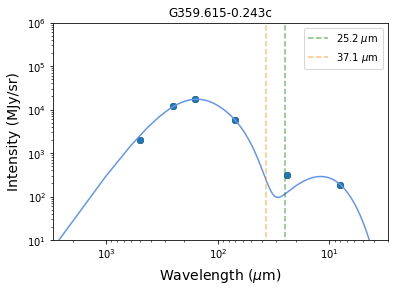

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


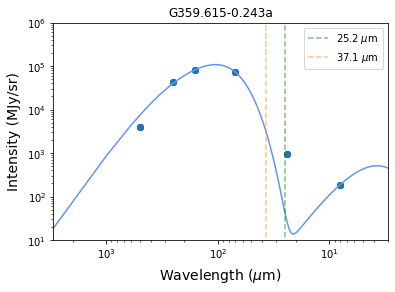

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


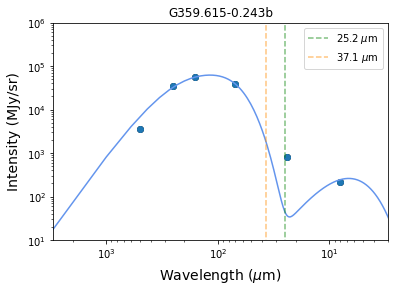

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


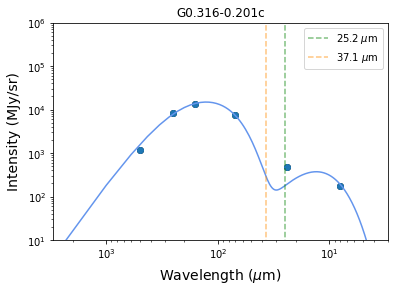

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


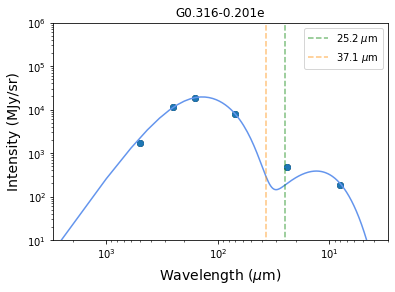

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


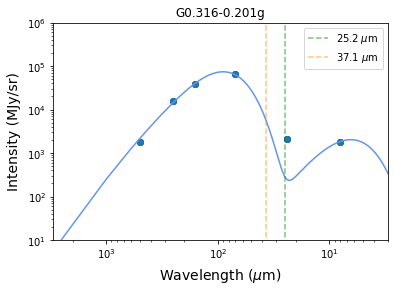

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


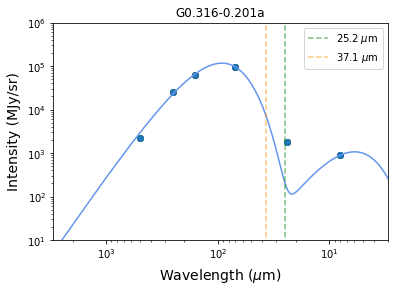

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


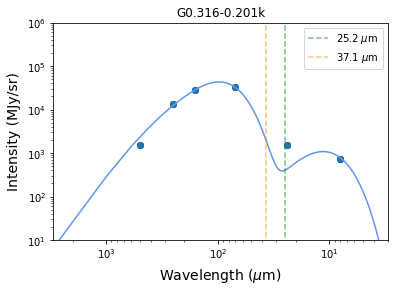

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


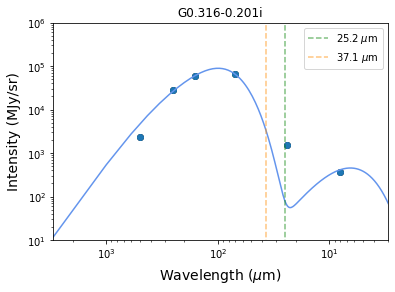

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


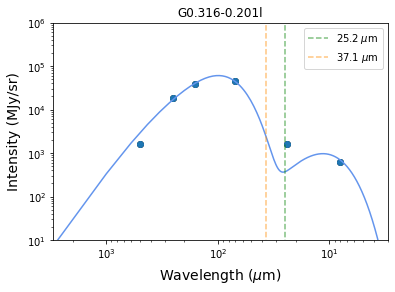

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


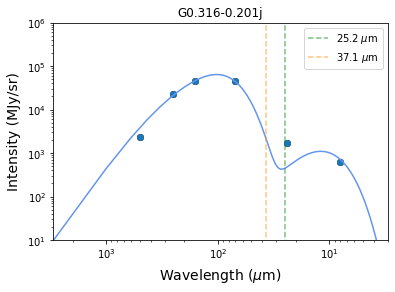

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


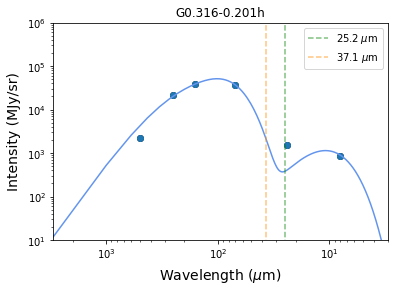

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


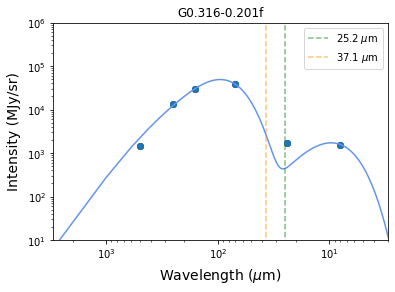

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


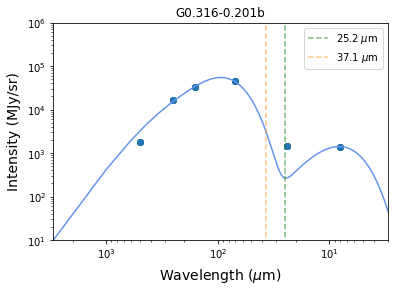

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


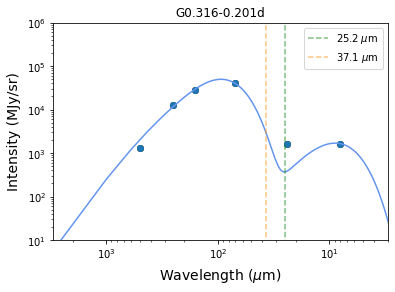

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


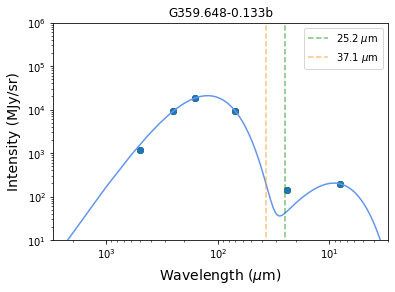

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


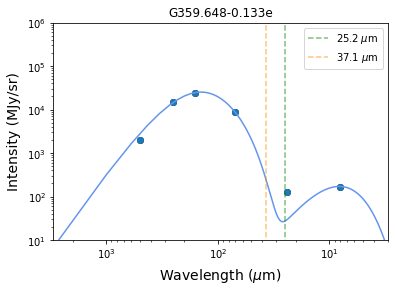

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


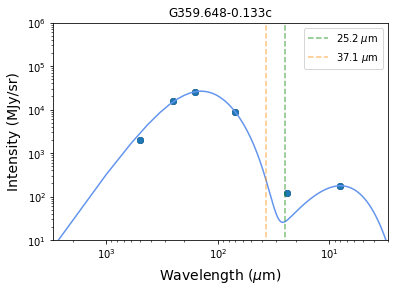

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


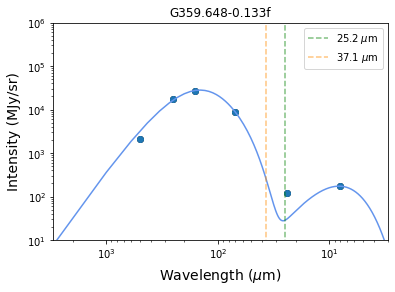

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


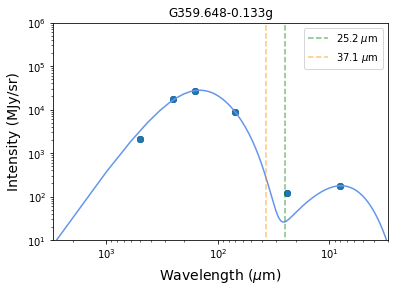

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


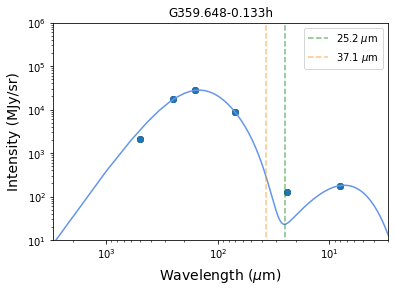

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


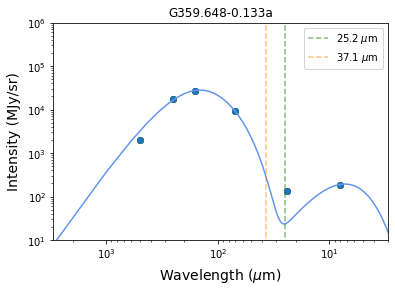

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


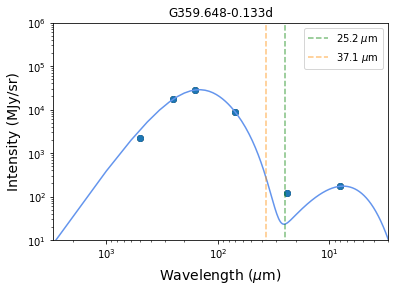

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


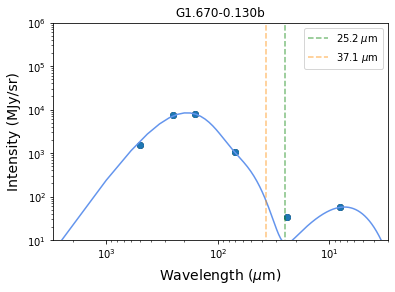

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


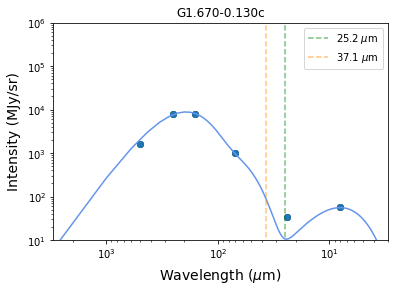

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


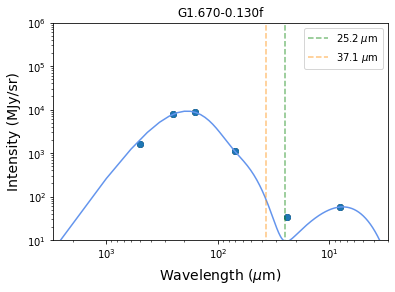

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


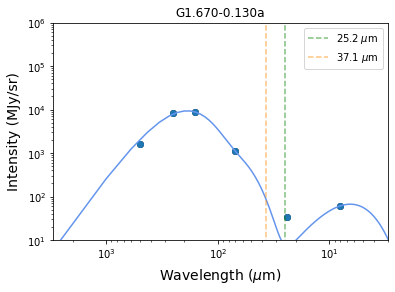

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


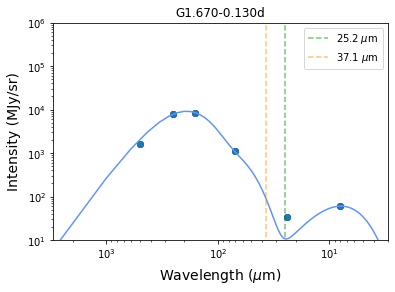

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


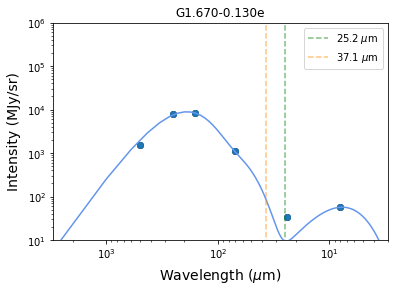

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


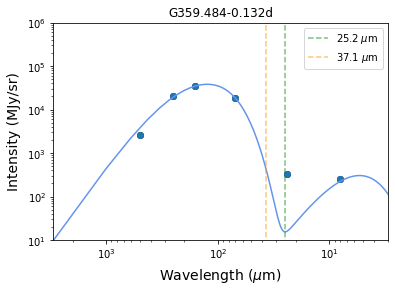

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


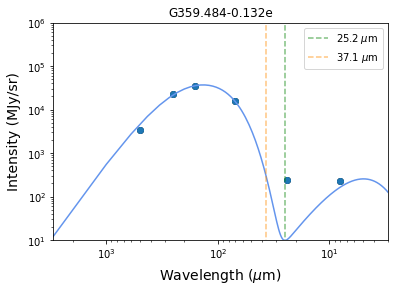

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


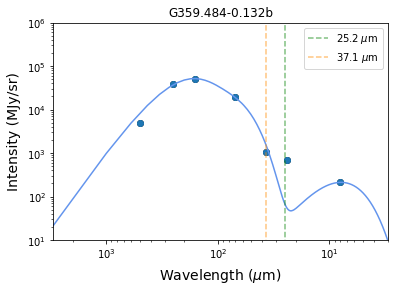

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


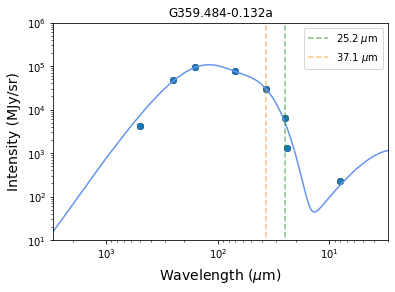

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


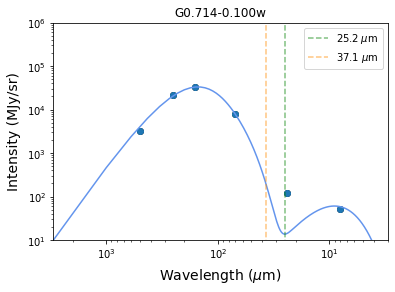

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


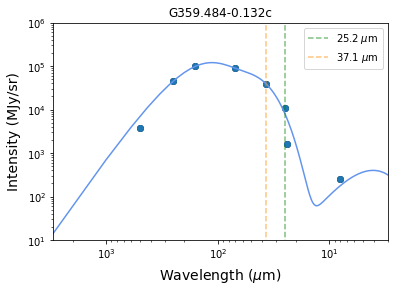

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


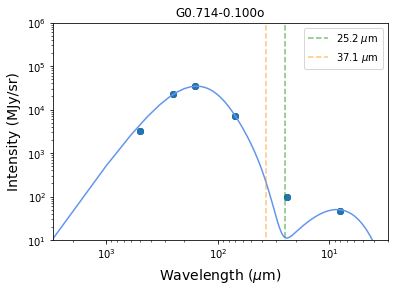

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


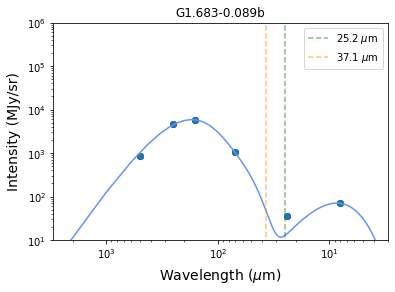

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


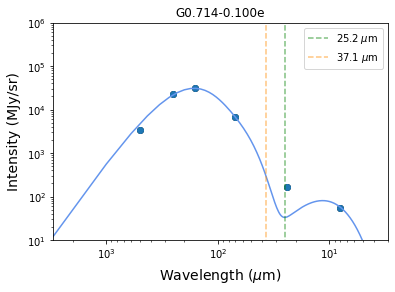

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


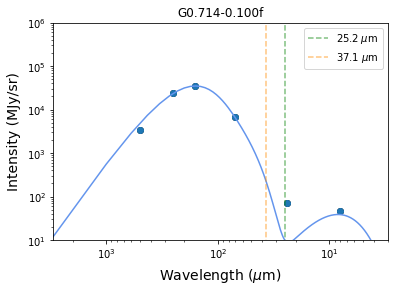

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


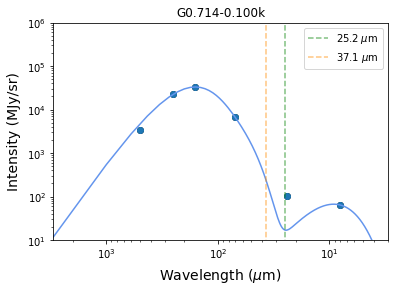

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


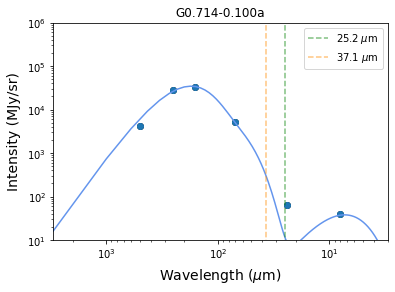

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


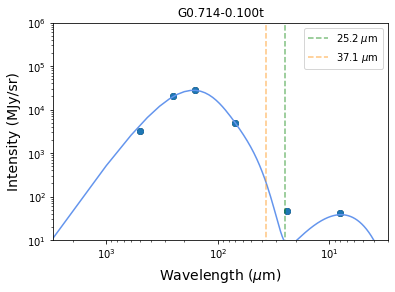

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


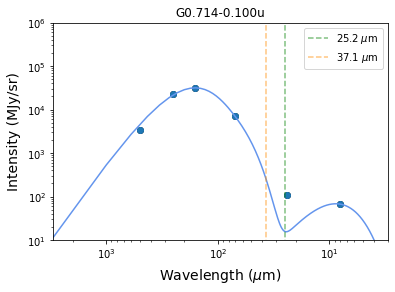

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


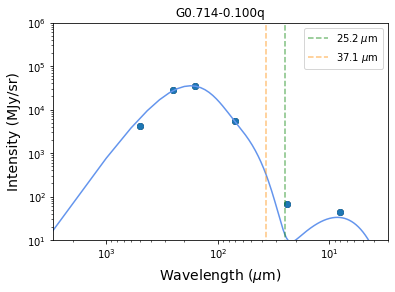

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


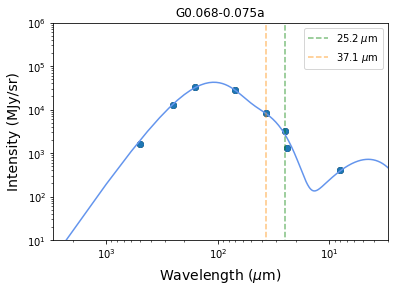

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


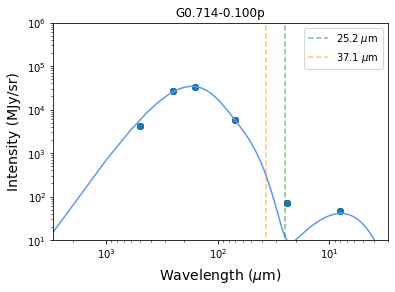

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


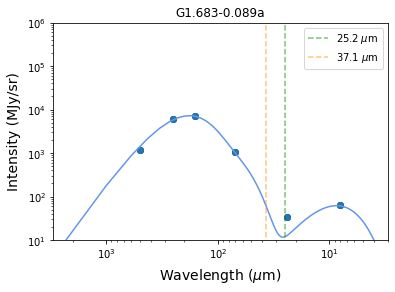

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


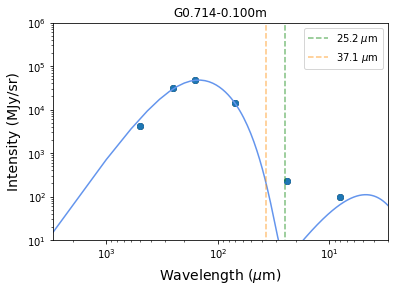

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


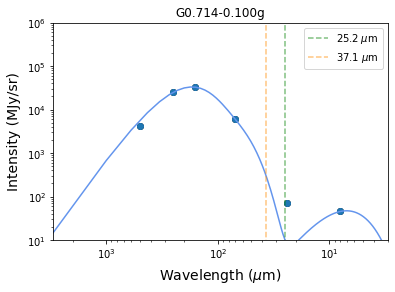

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


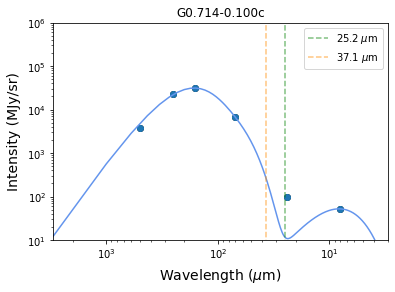

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


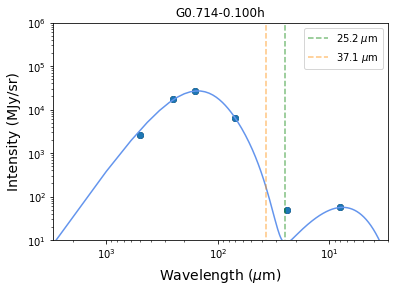

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

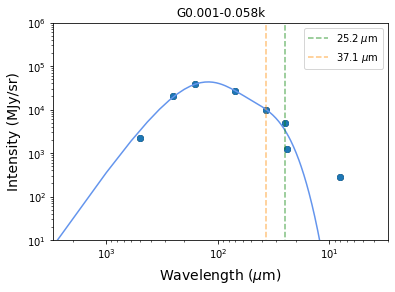

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


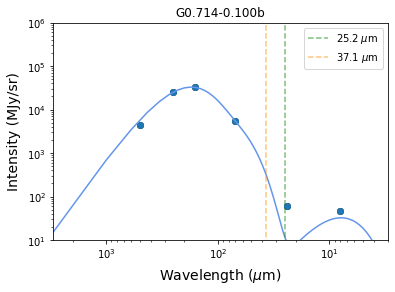

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


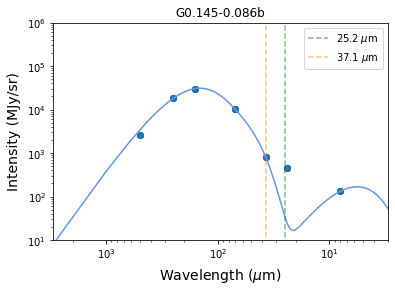

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


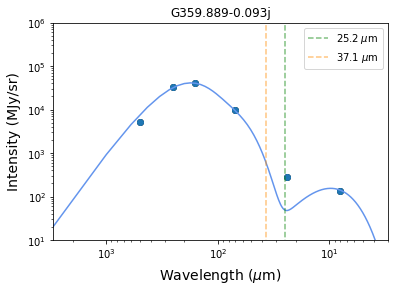

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


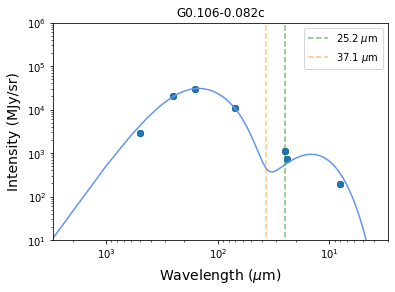

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


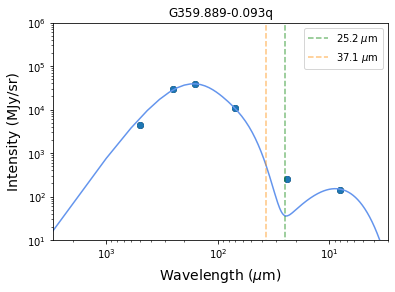

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


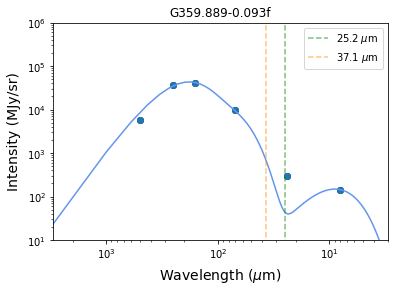

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


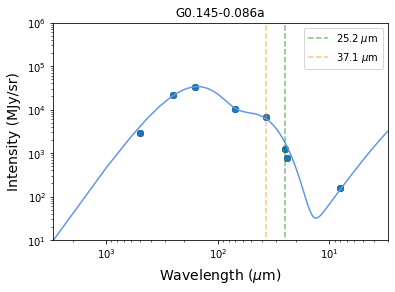

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


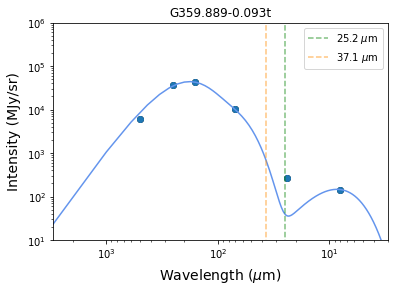

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


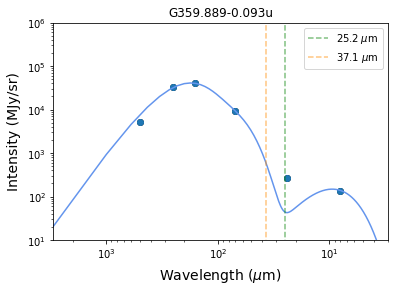

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


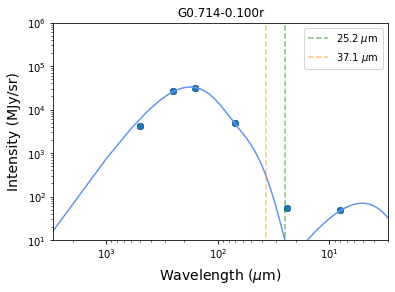

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


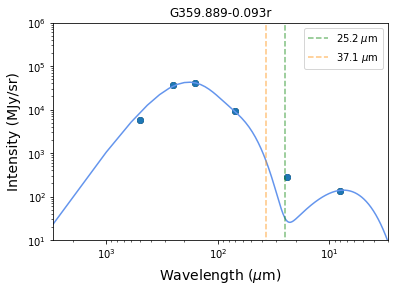

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


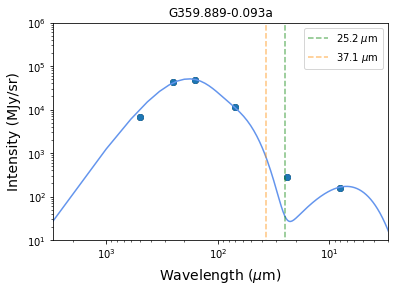

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


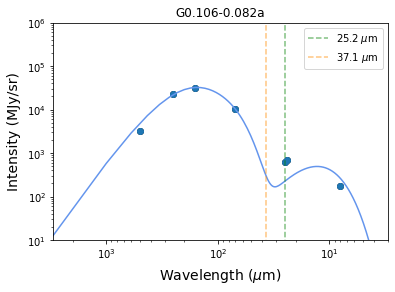

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


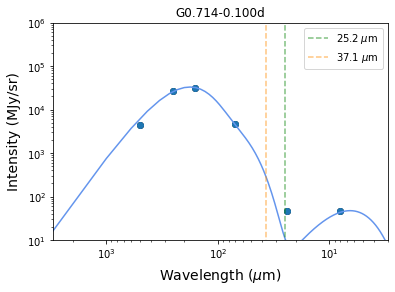

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


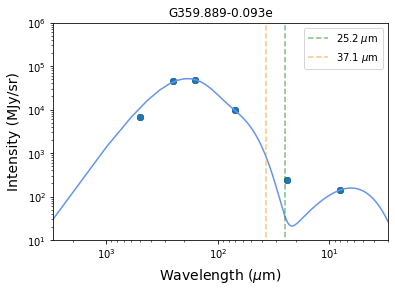

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


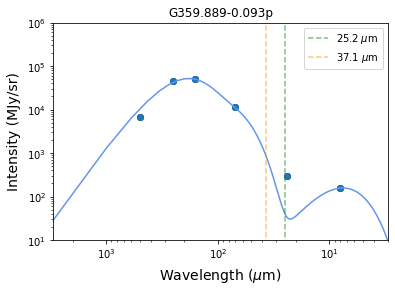

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


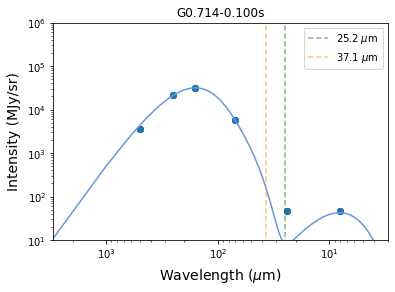

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


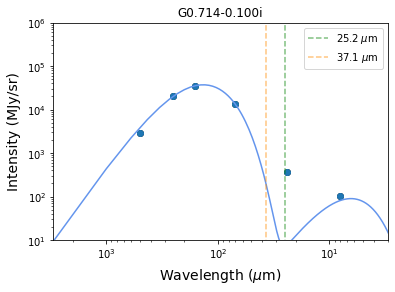

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


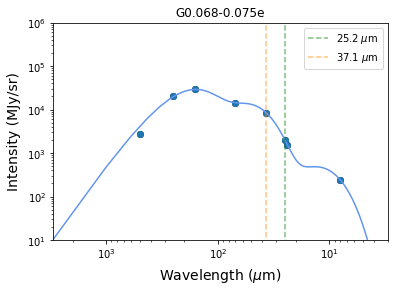

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


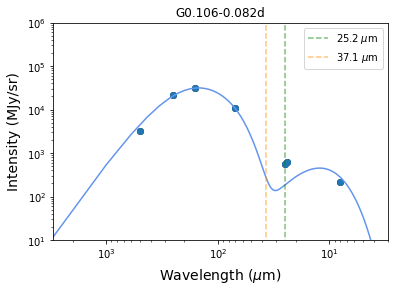

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


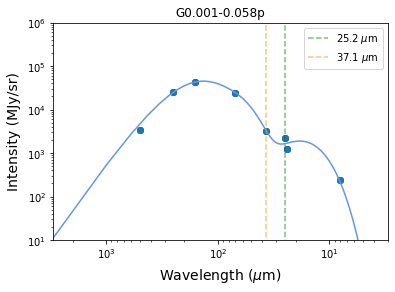

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


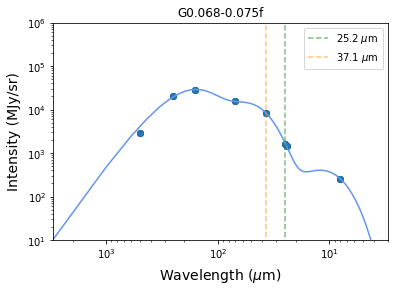

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


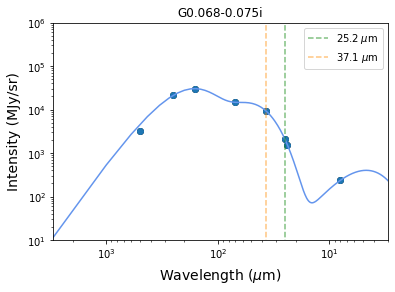

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


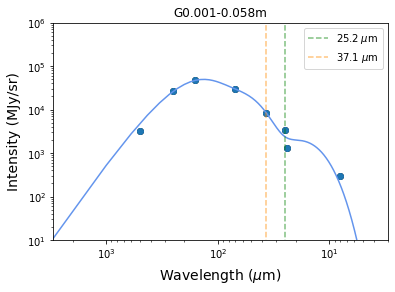

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


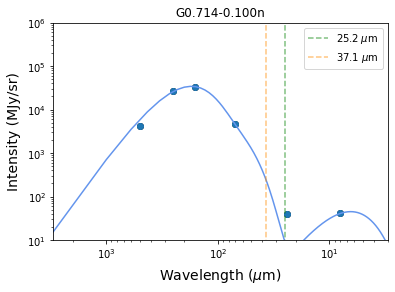

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


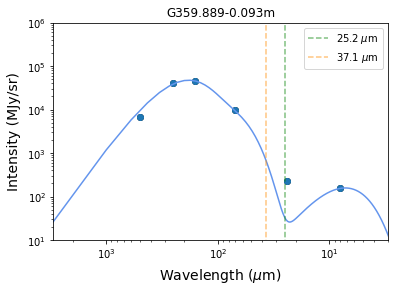

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


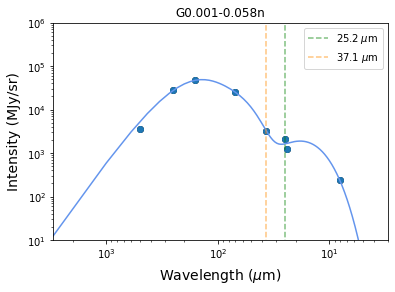

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


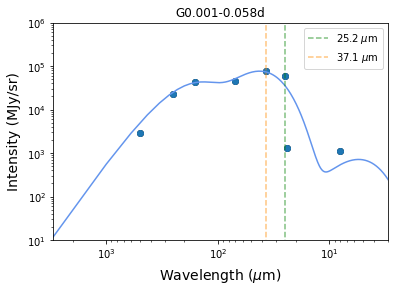

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


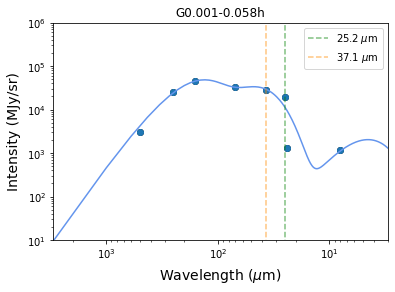

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


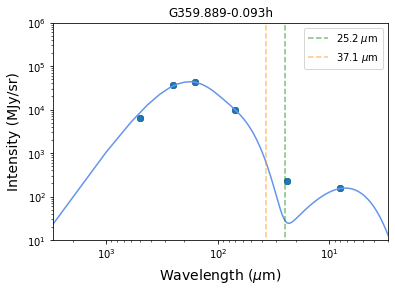

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


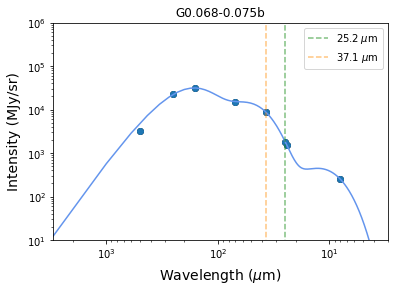

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


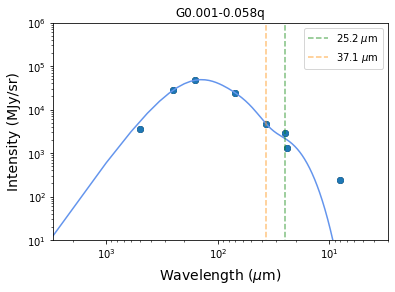

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


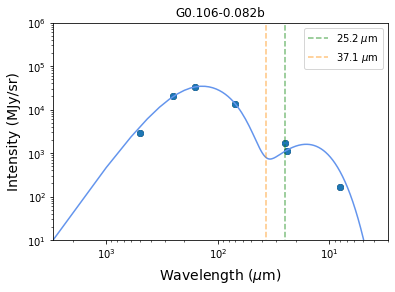

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


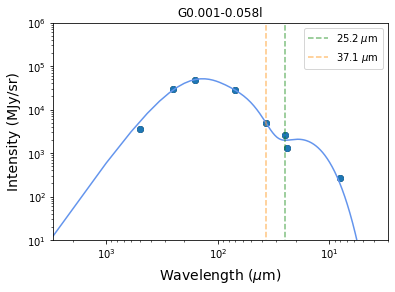

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


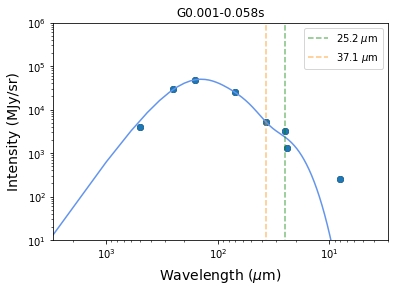

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


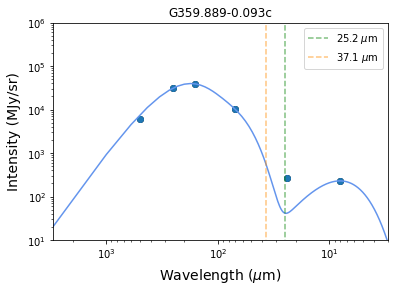

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


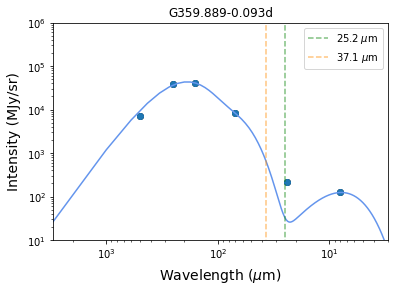

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


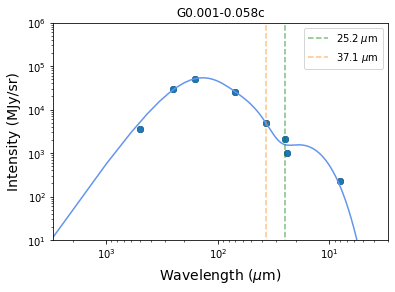

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

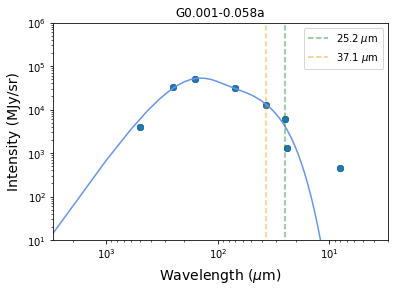

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


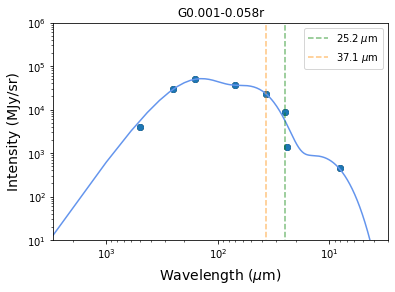

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


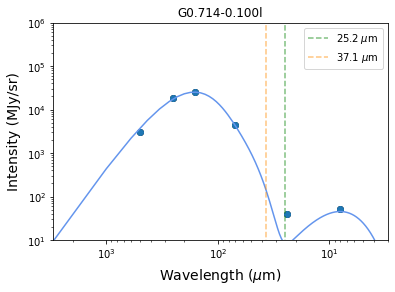

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


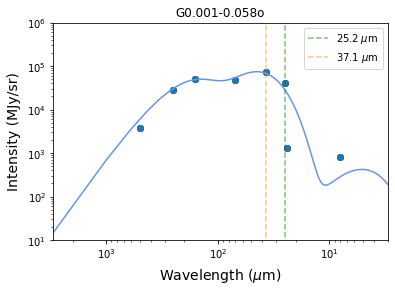

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


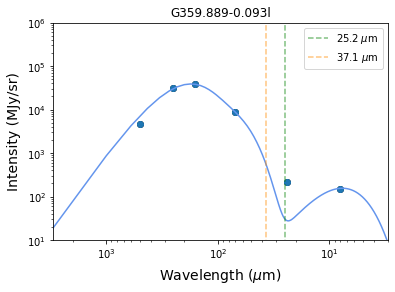

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


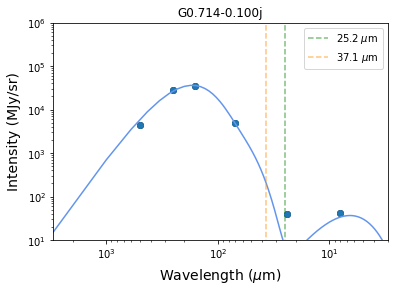

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


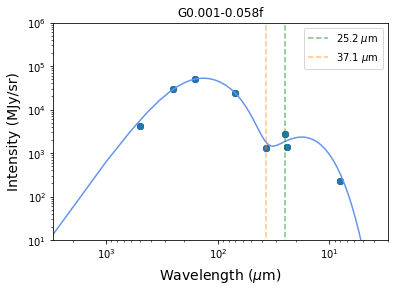

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


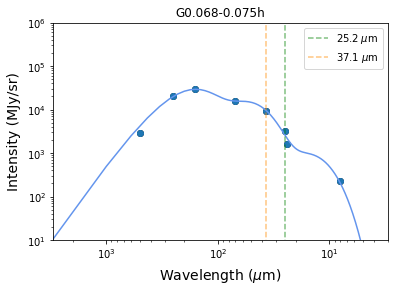

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


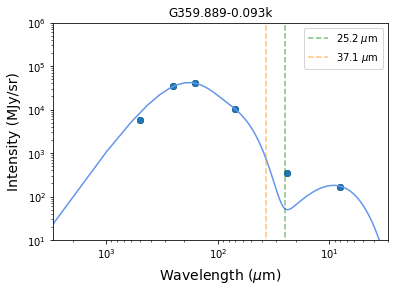

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


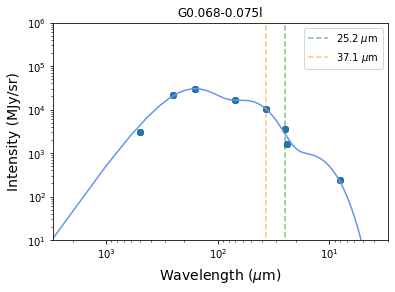

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


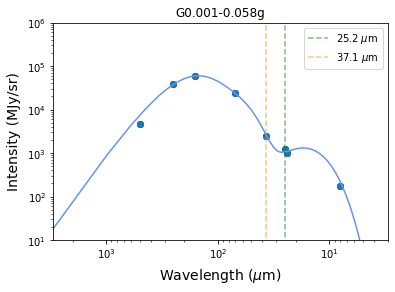

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


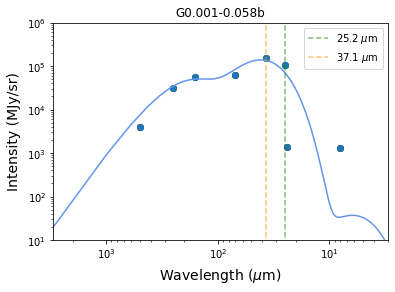

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


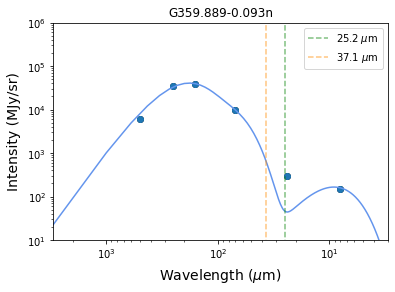

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


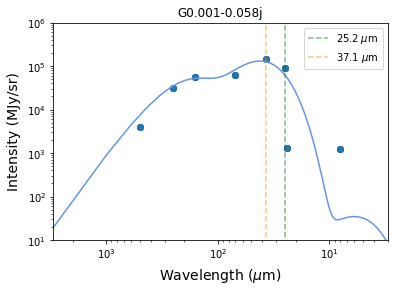

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


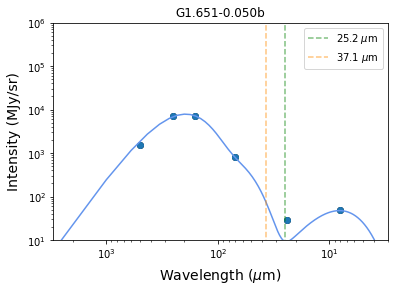

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


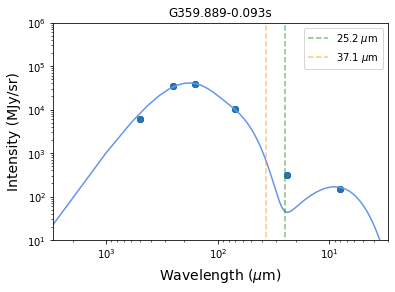

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


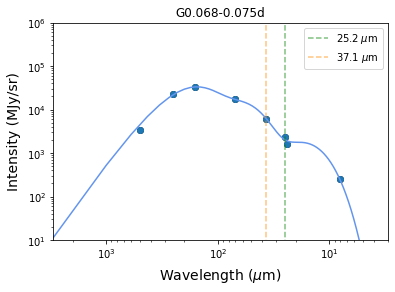

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


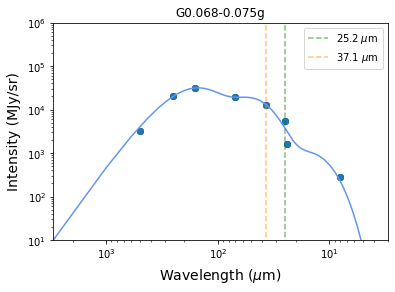

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


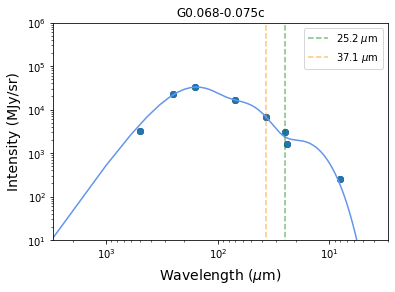

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


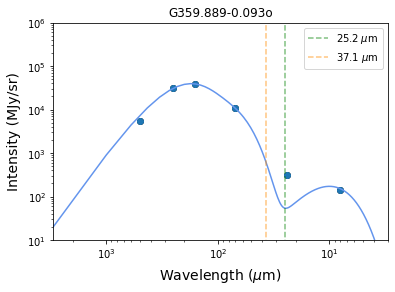

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


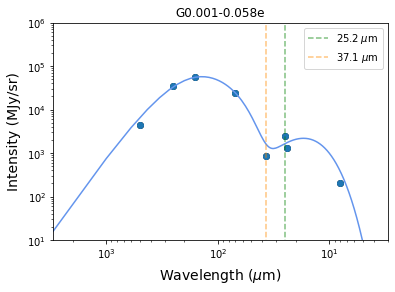

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


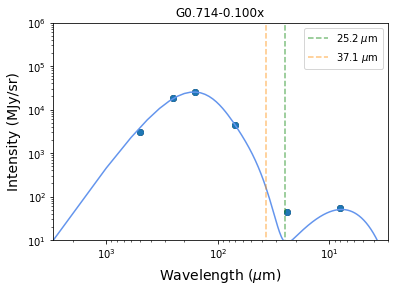

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

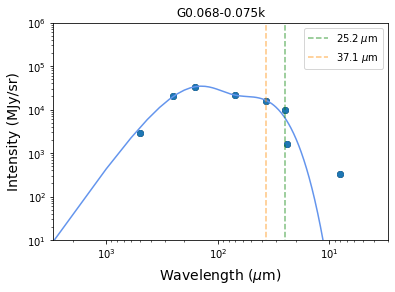

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


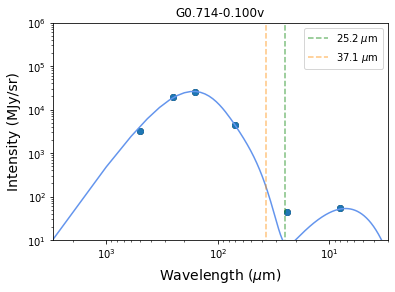

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


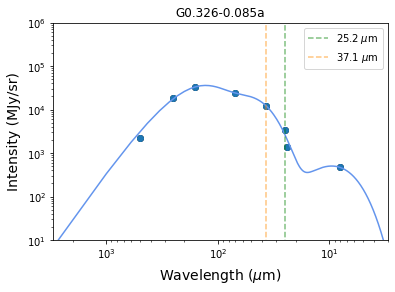

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

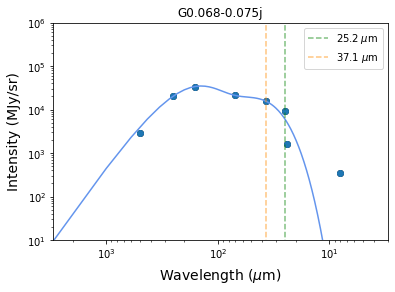

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


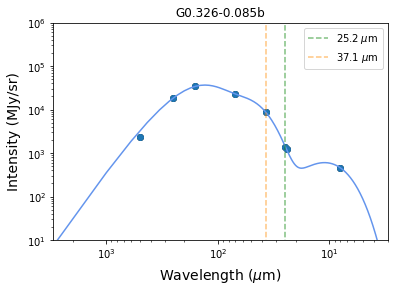

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


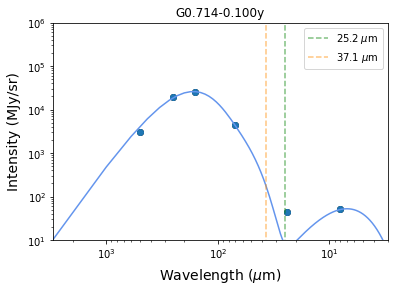

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


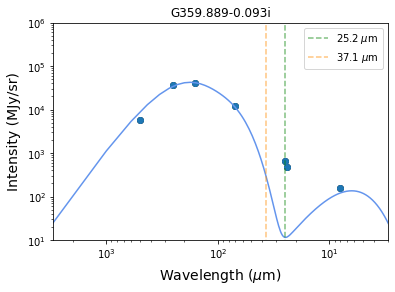

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


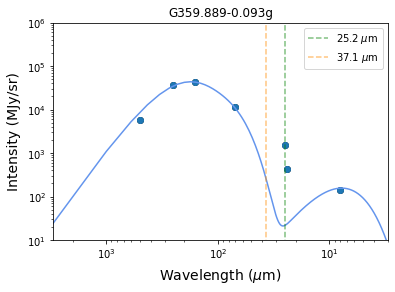

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


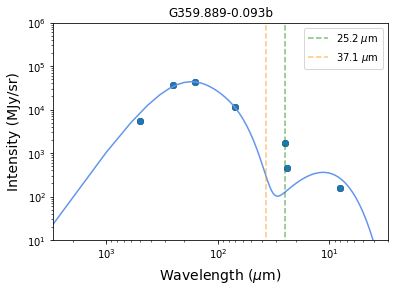

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


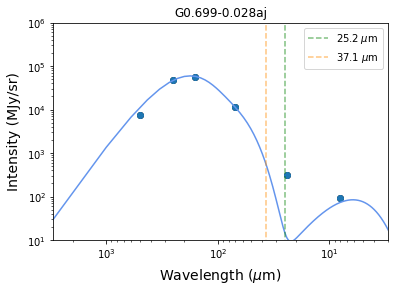

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


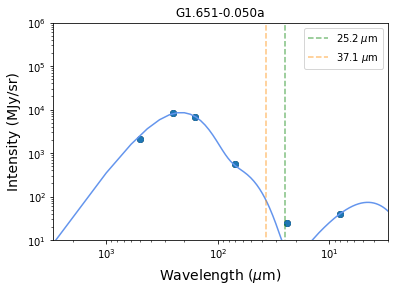

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


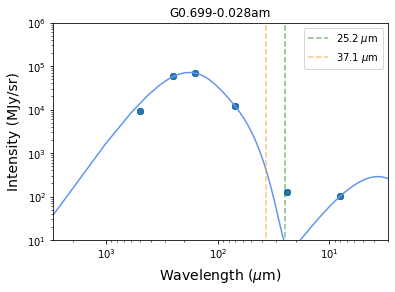

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


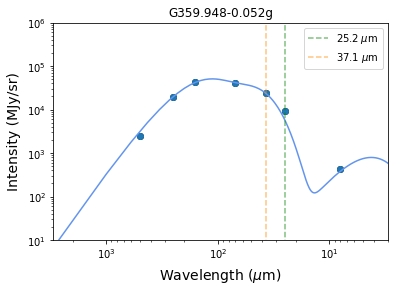

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


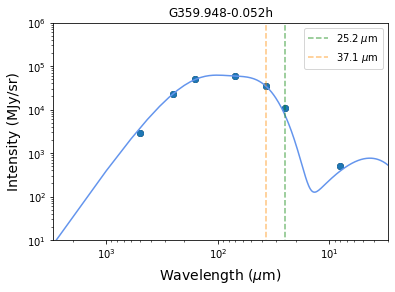

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


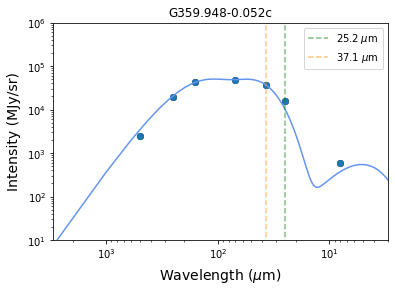

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


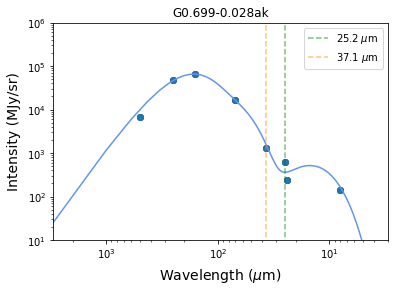

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


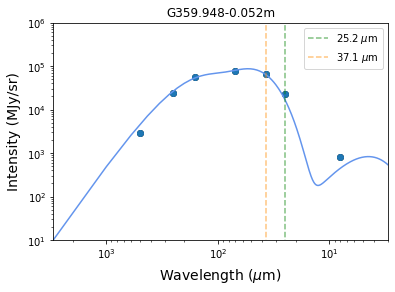

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


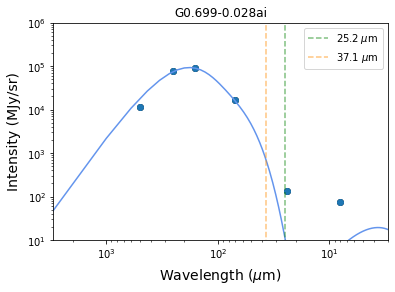

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


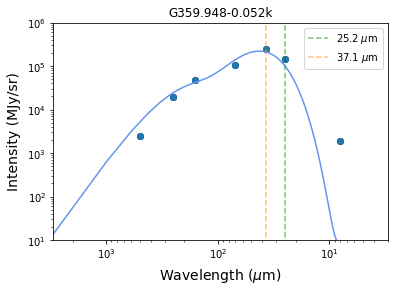

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


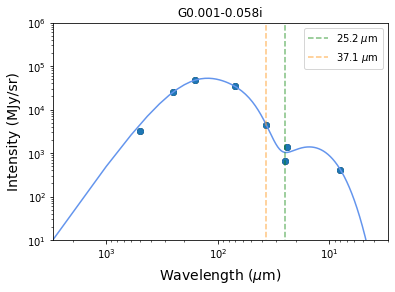

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


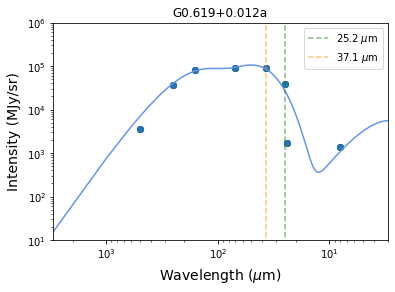

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


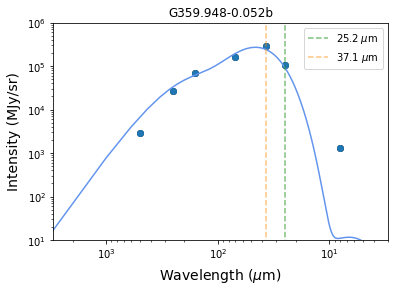

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


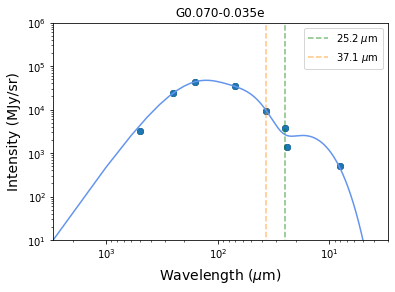

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


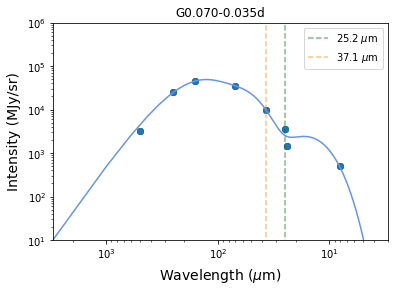

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


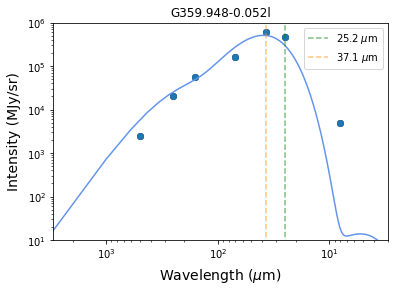

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


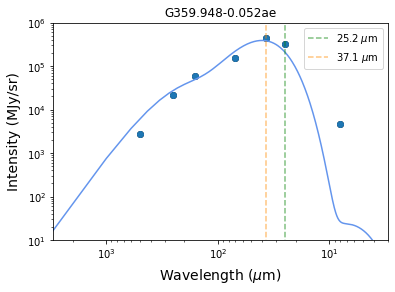

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


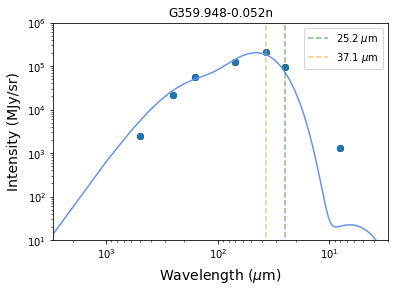

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


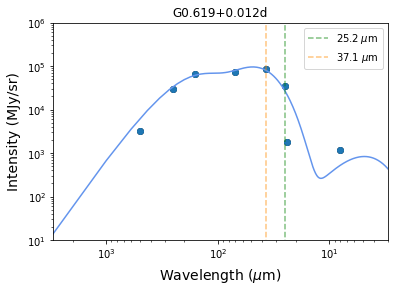

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


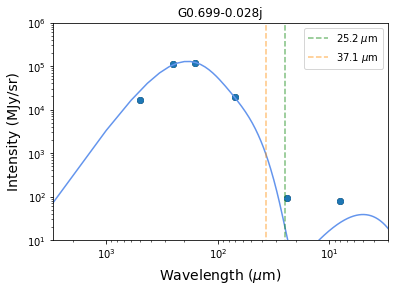

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


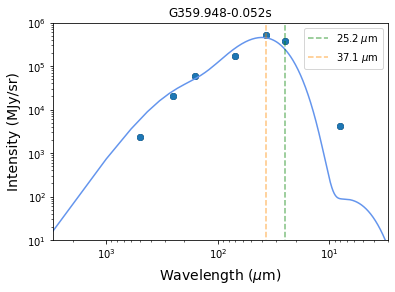

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


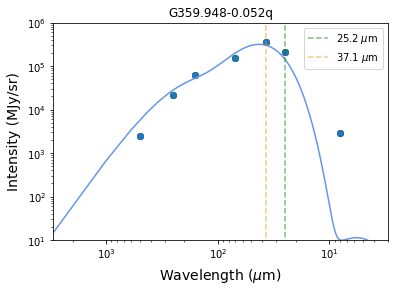

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


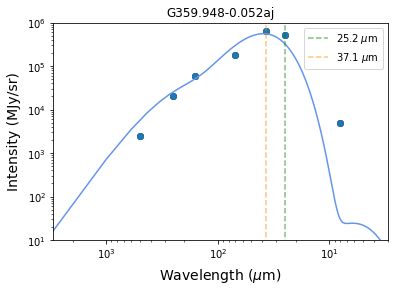

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


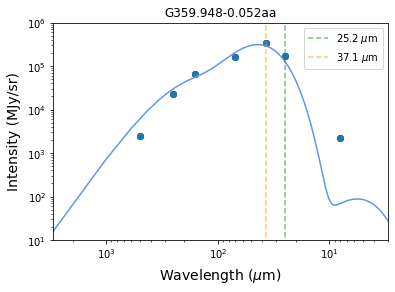

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


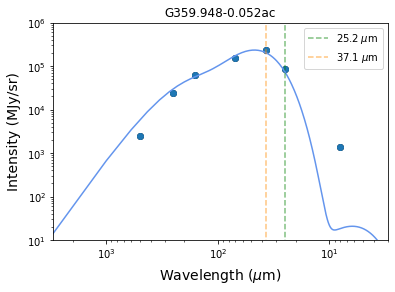

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


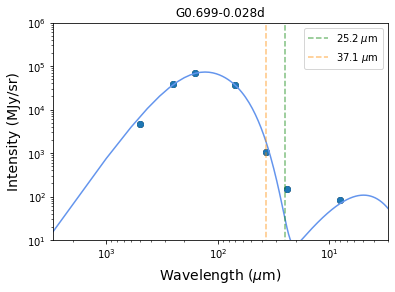

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


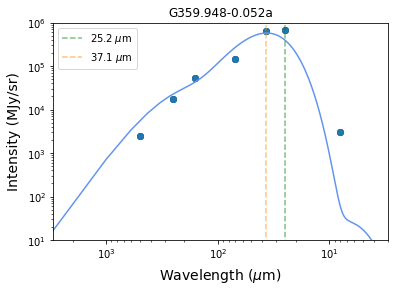

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


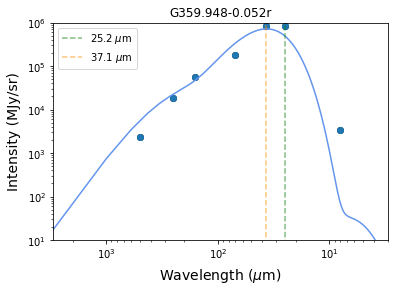

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


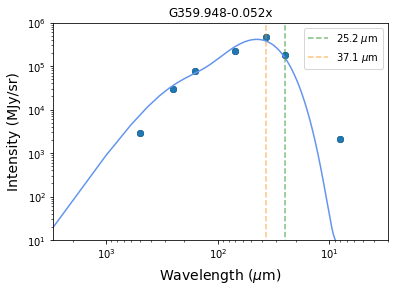

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


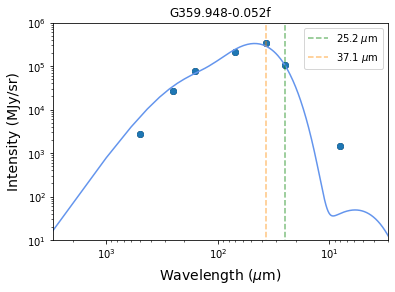

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


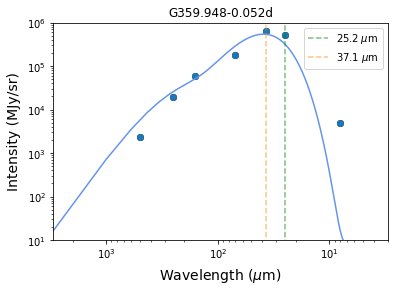

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


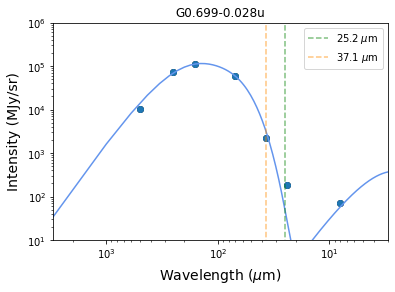

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


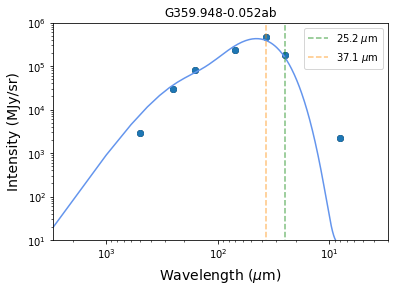

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


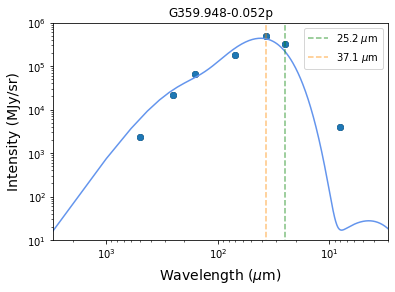

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


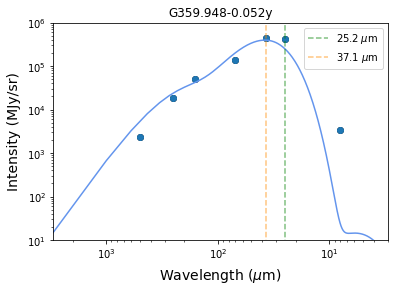

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


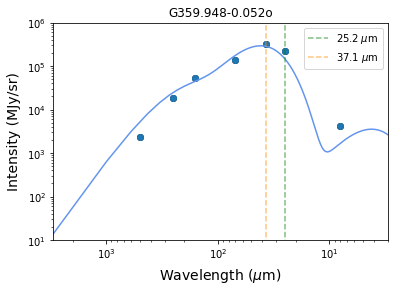

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


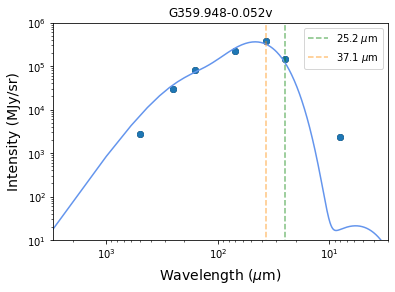

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


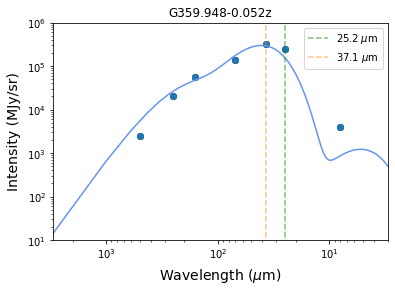

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


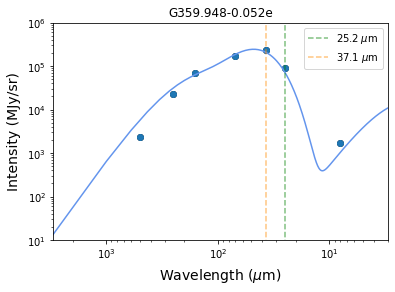

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


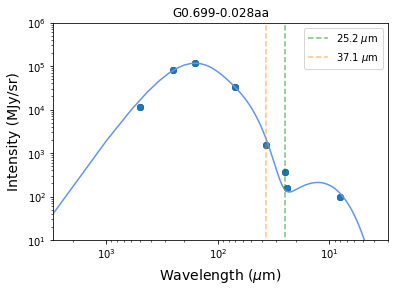

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


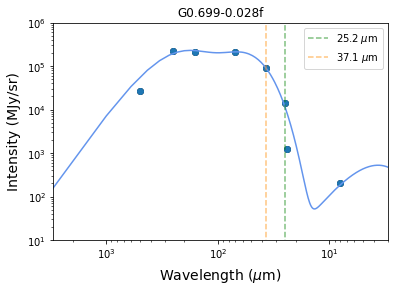

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))


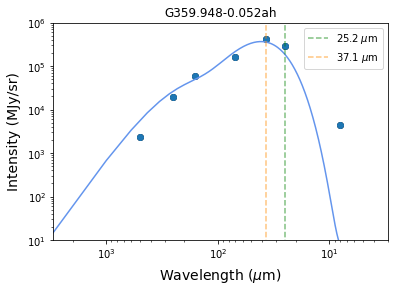

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


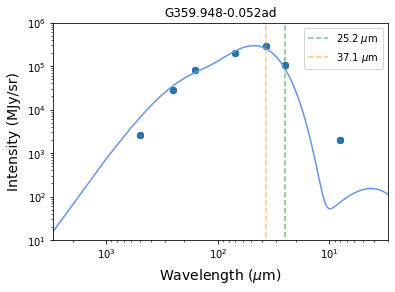

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


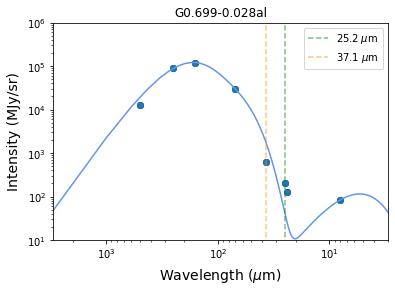

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


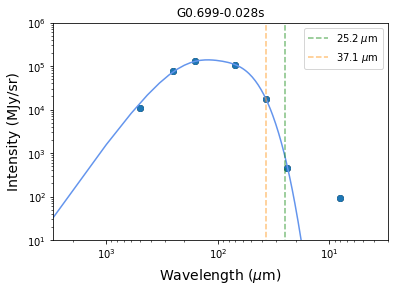

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

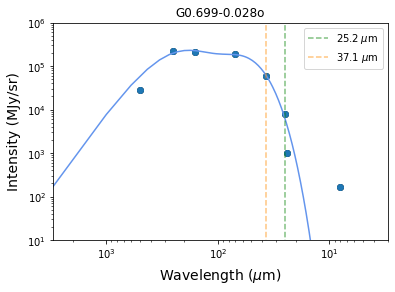

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


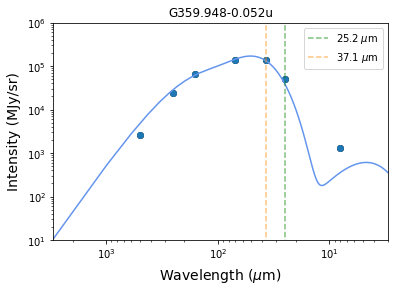

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

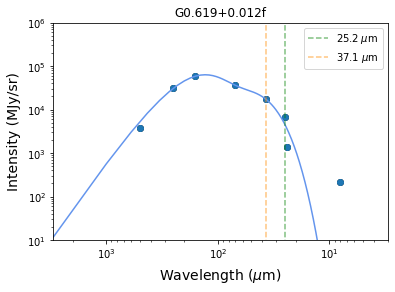

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


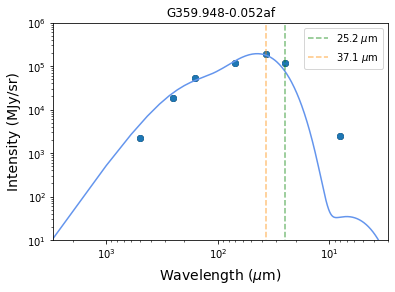

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


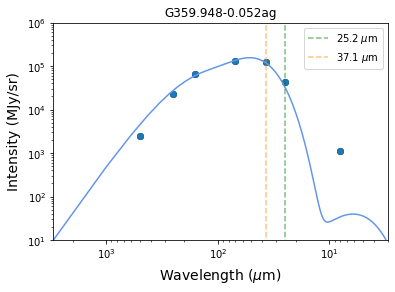

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


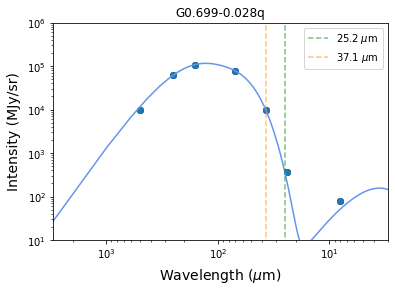

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


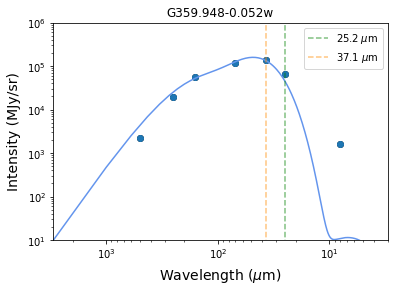

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


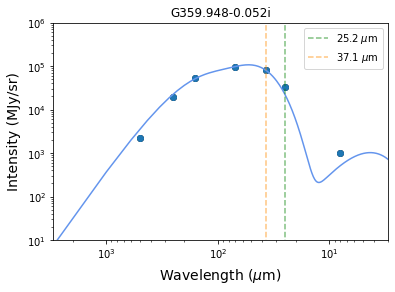

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


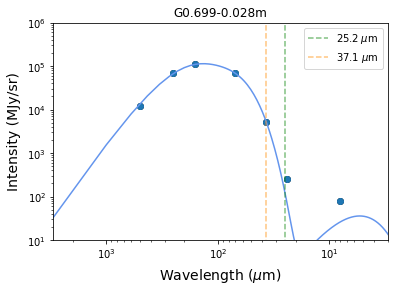

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


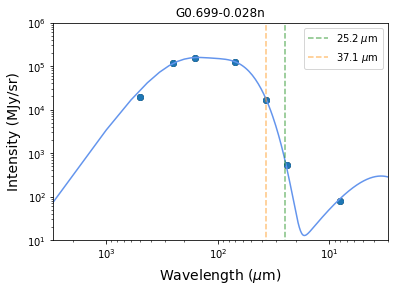

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


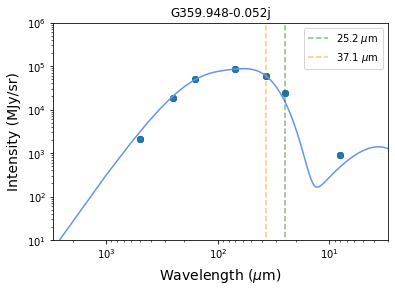

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


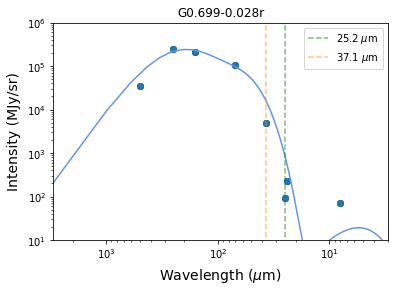

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


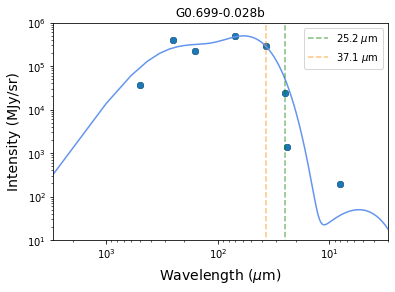

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


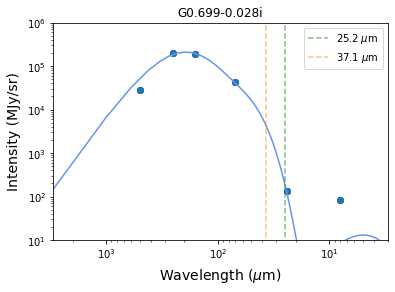

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


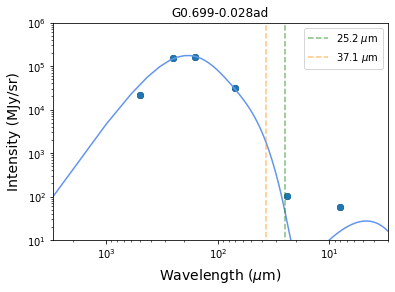

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


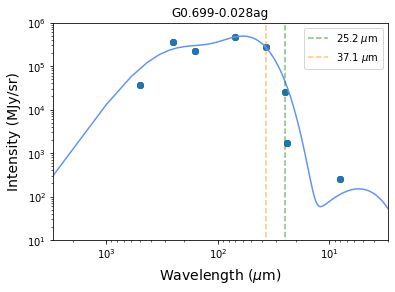

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


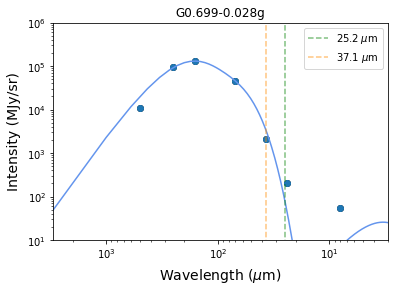

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


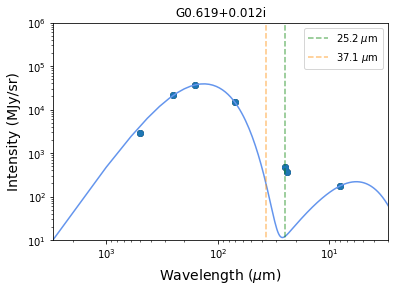

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


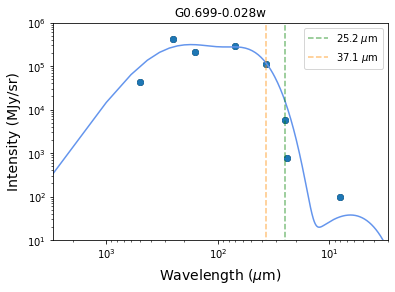

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


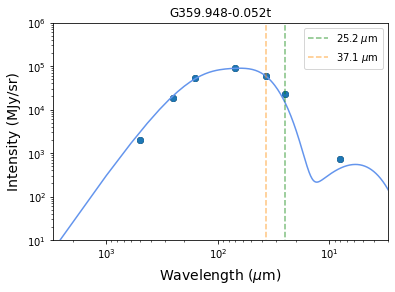

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


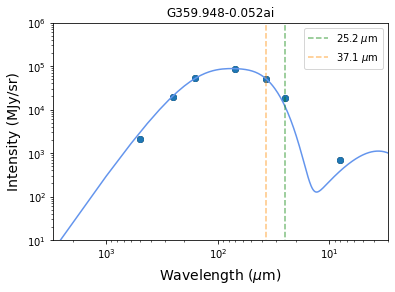

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


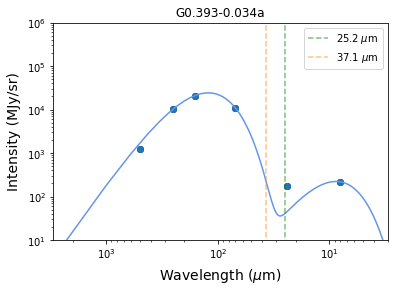

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


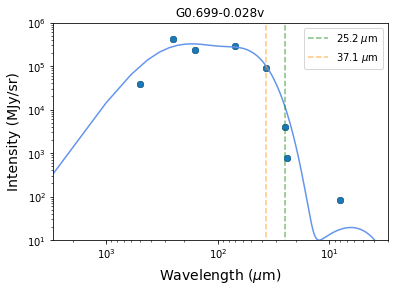

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


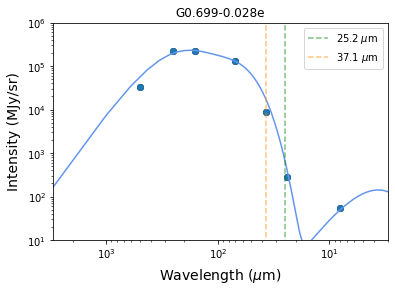

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


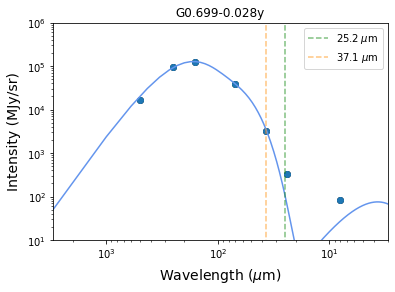

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


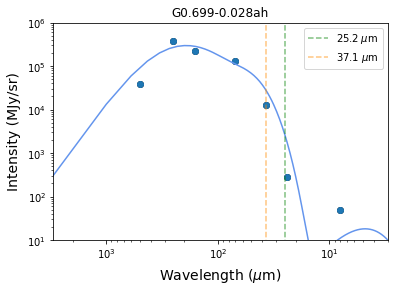

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


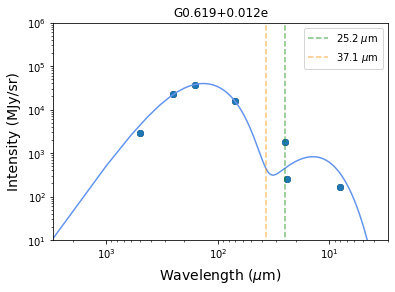

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


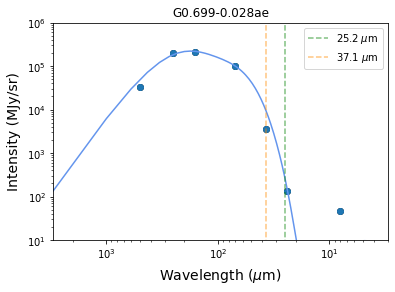

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


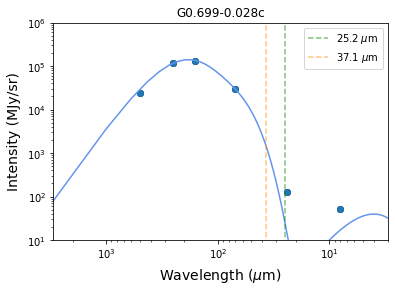

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


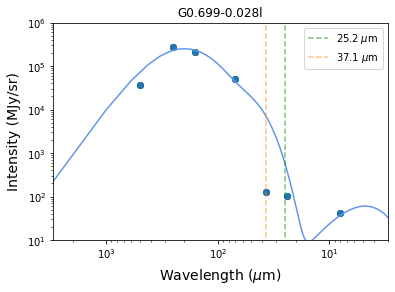

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


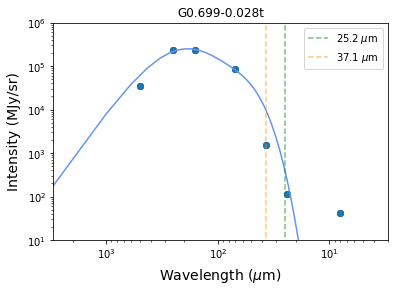

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


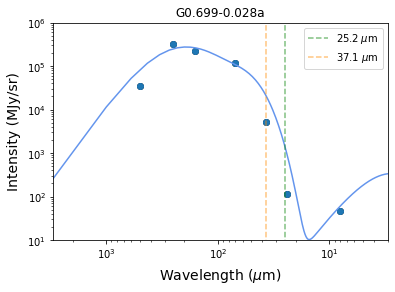

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


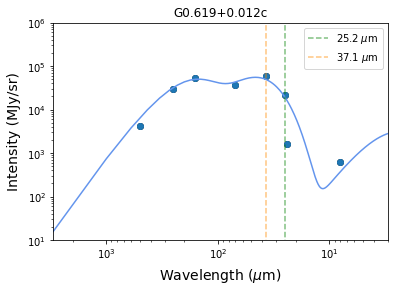

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


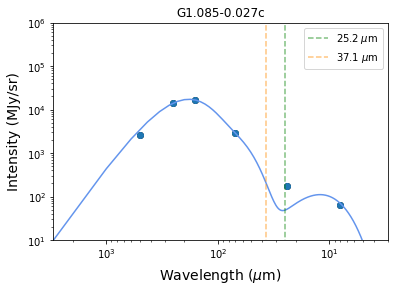

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


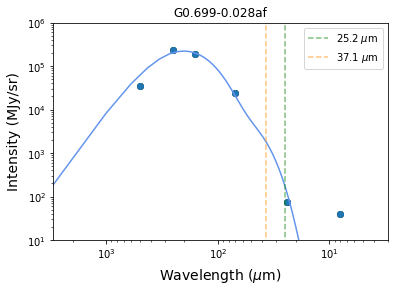

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


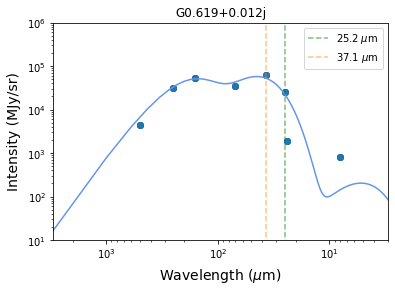

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


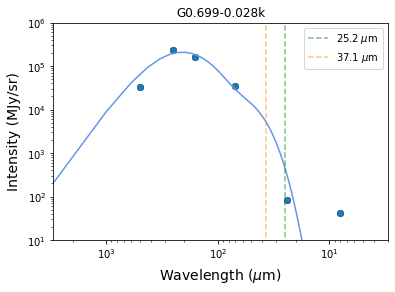

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


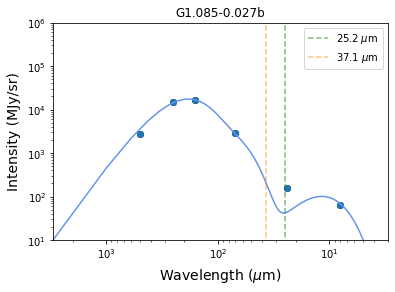

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


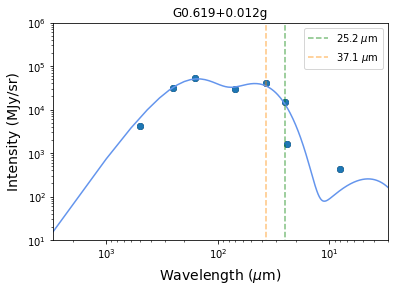

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


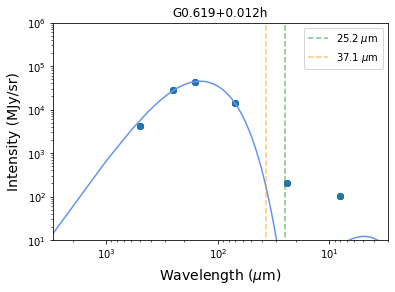

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


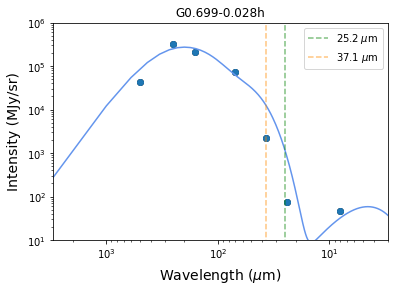

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


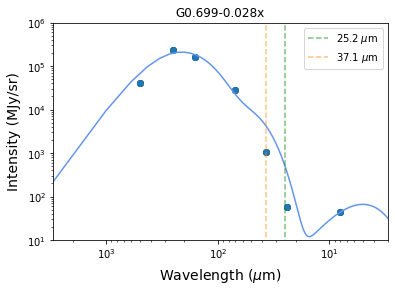

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


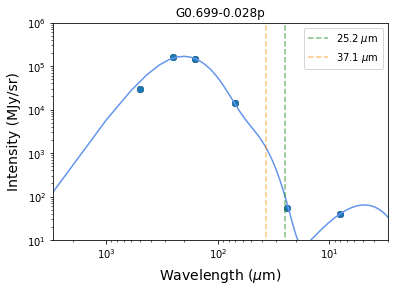

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


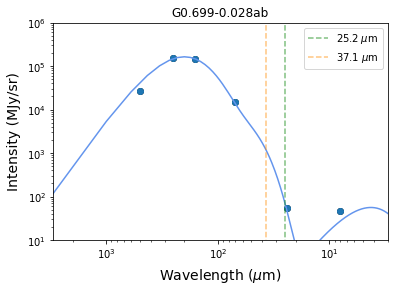

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


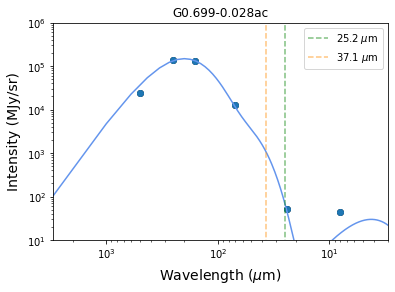

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


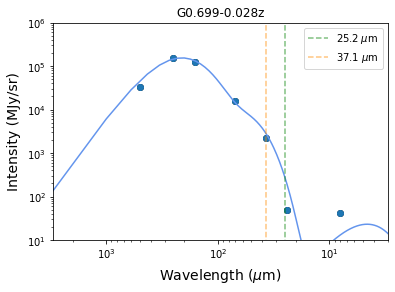

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


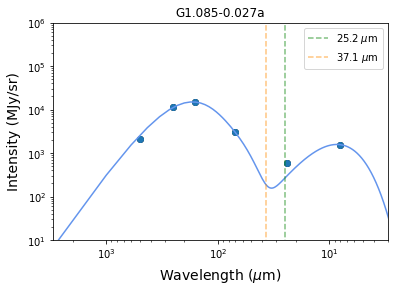

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


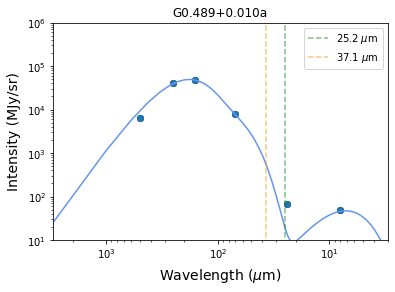

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


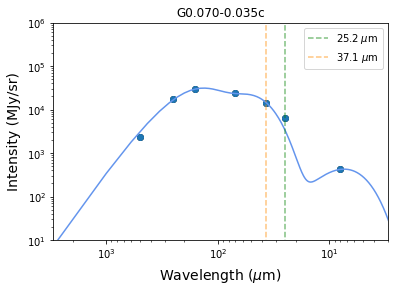

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


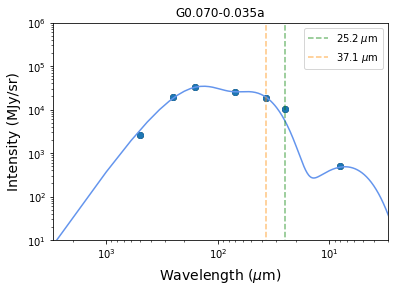

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


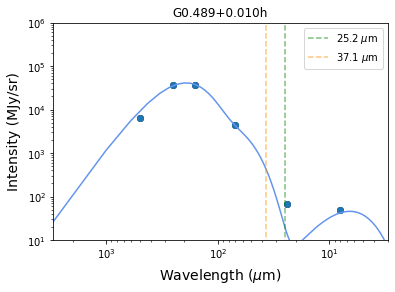

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encountered in exp
  F_h     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_h)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:16: RuntimeWarning: overflow encount

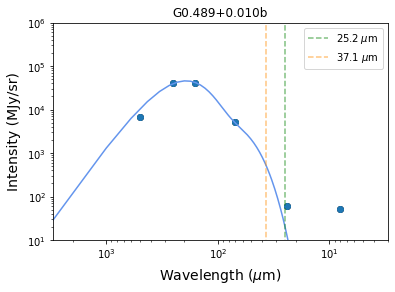

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


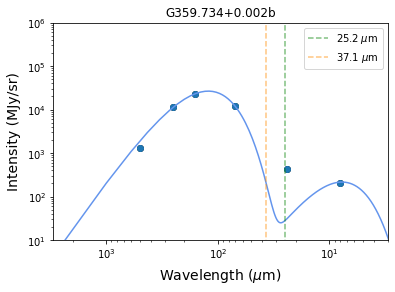

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


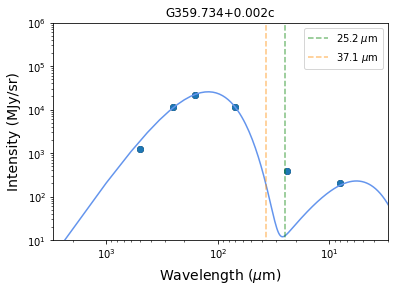

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


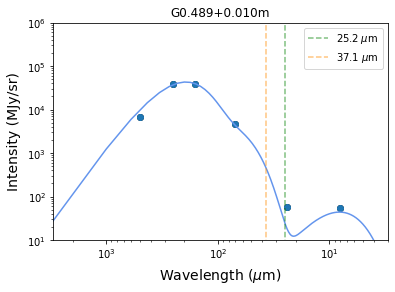

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


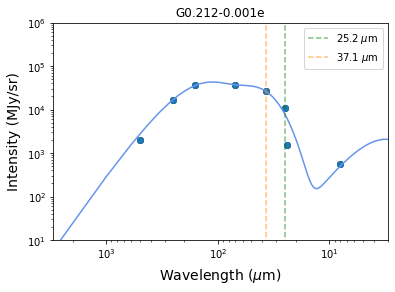

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


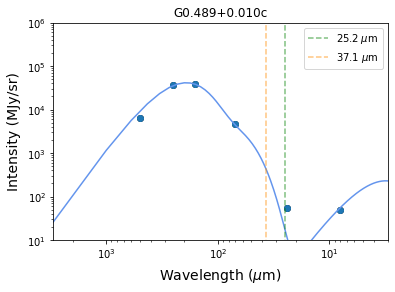

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


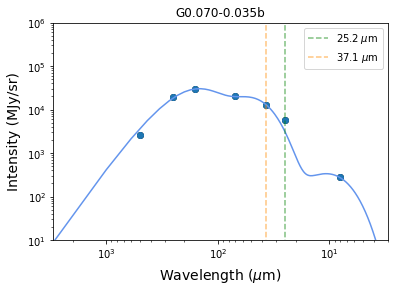

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


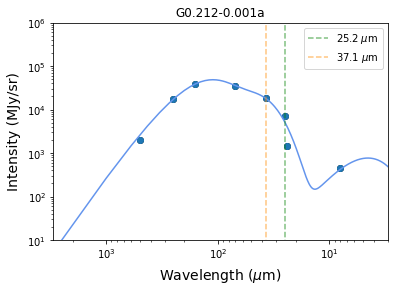

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


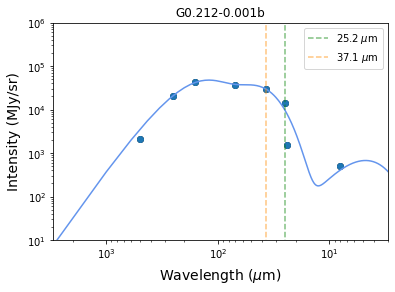

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


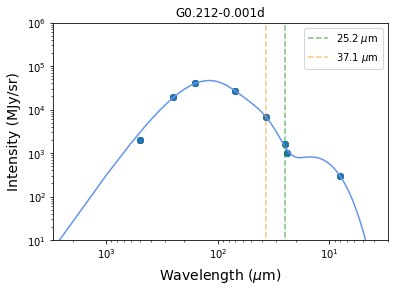

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


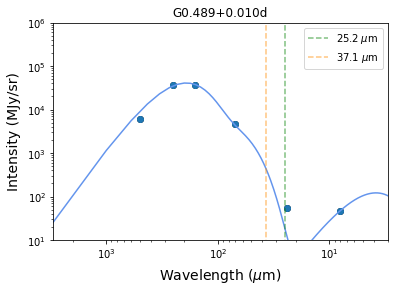

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


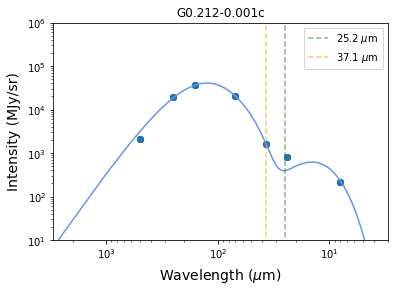

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


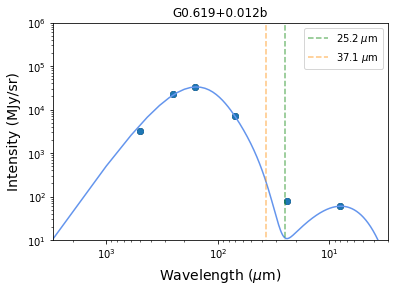

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


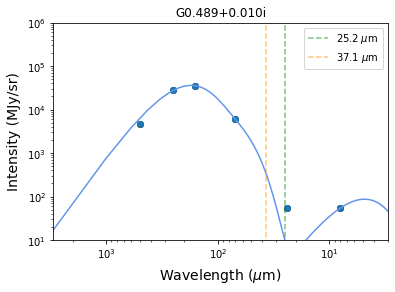

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


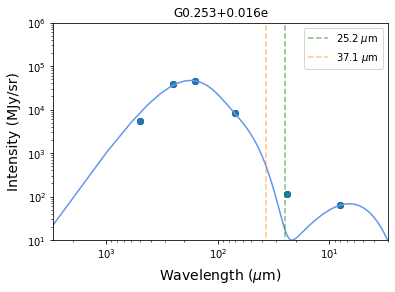

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


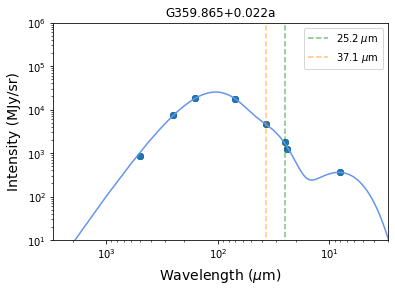

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


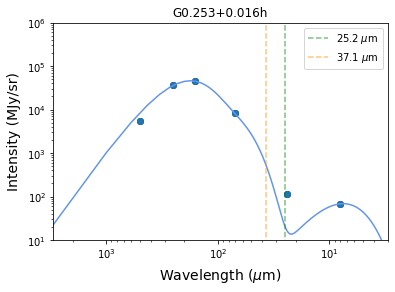

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


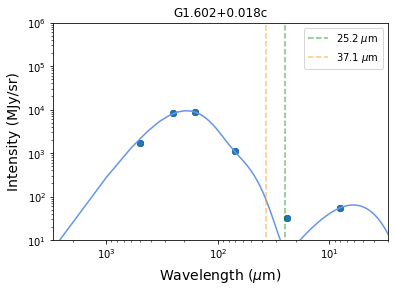

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


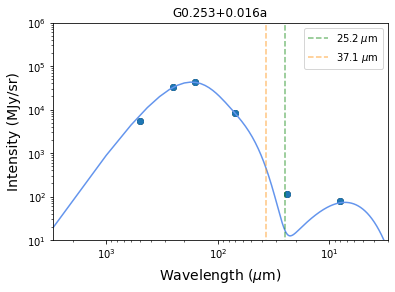

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


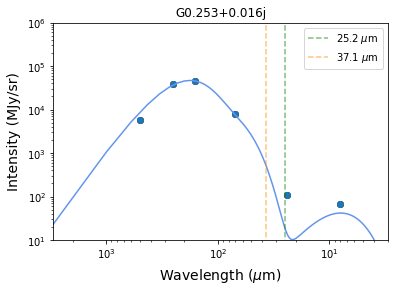

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


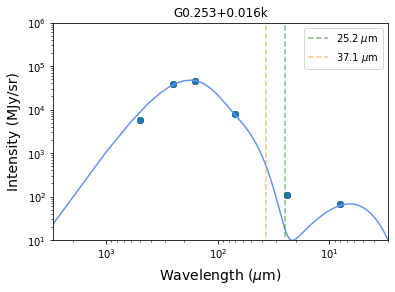

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


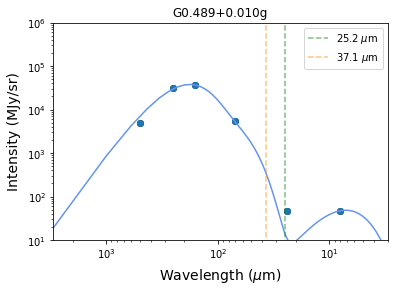

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


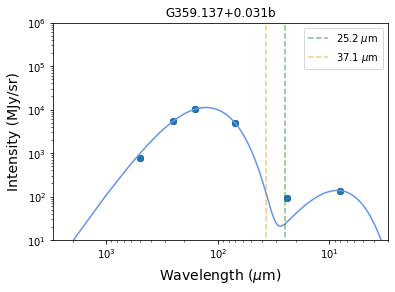

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


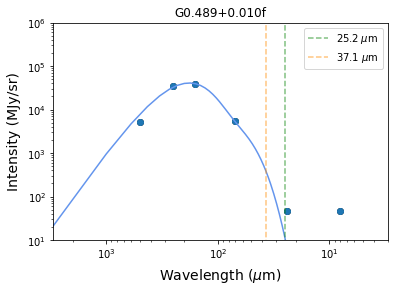

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


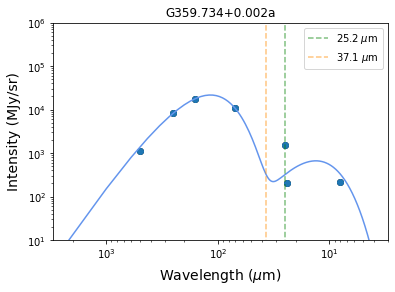

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


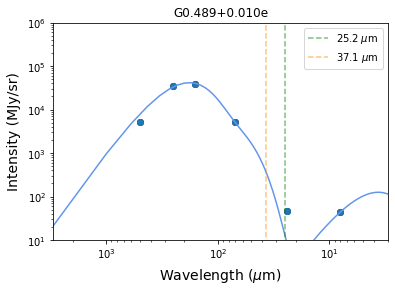

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


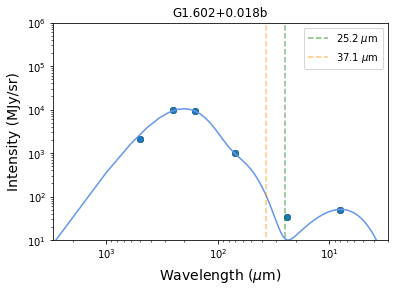

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


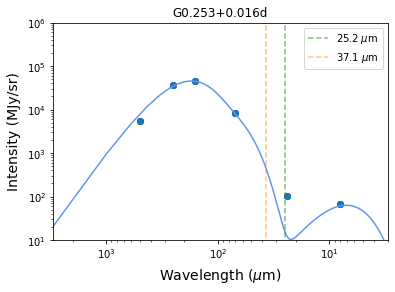

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


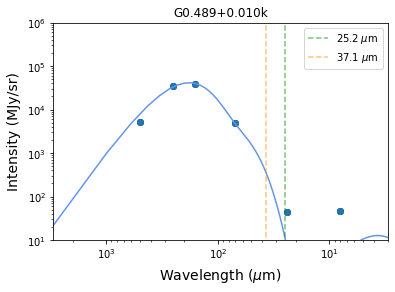

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


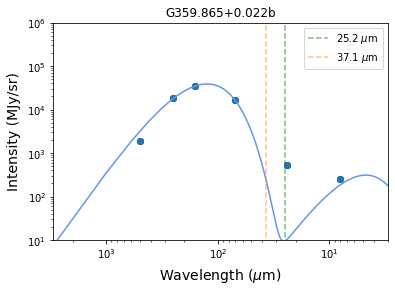

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


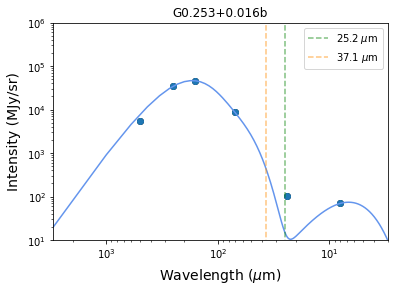

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


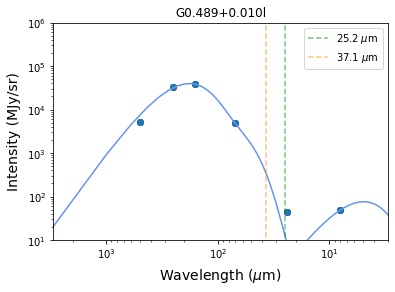

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


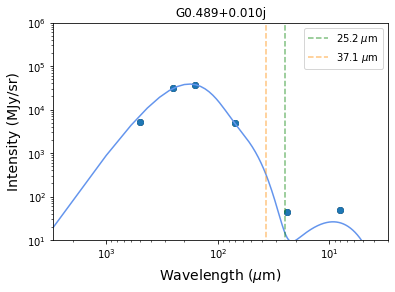

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


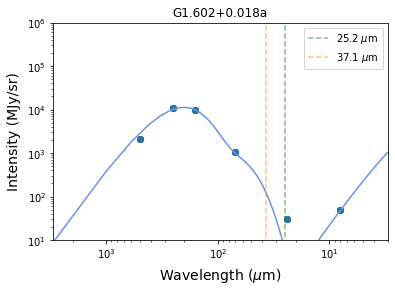

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


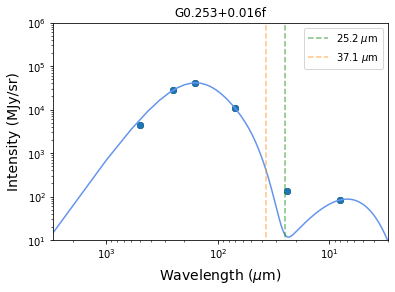

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


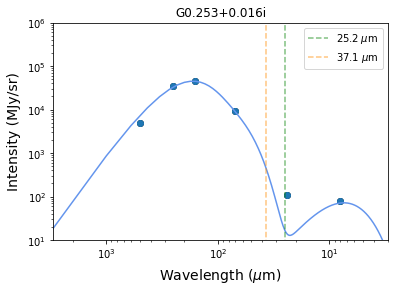

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


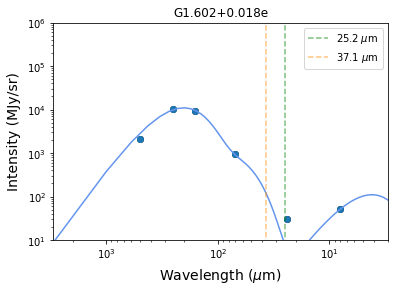

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


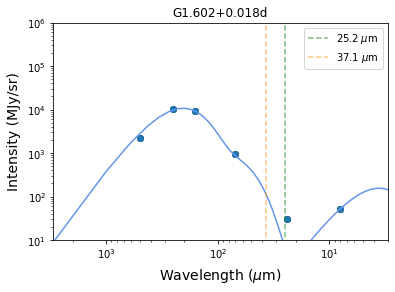

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


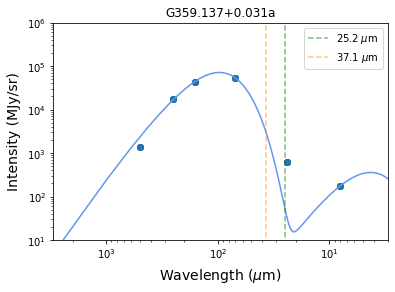

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


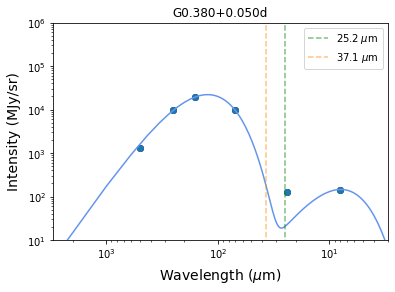

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


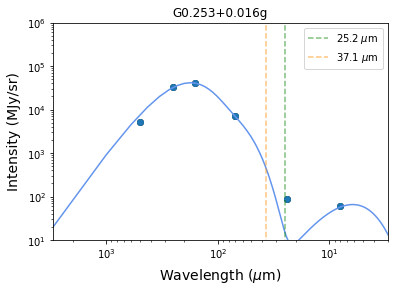

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


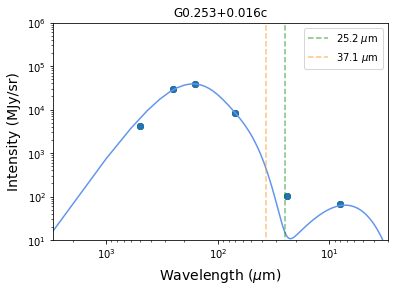

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


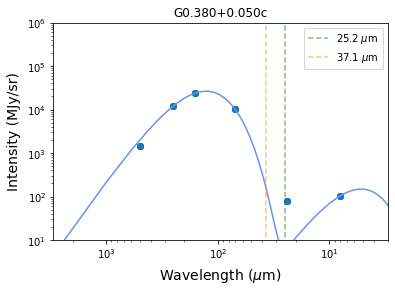

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


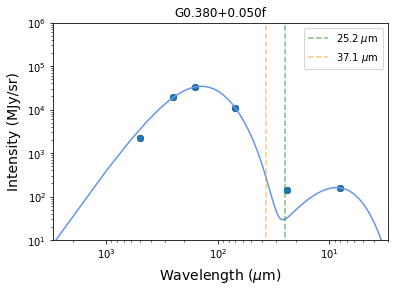

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


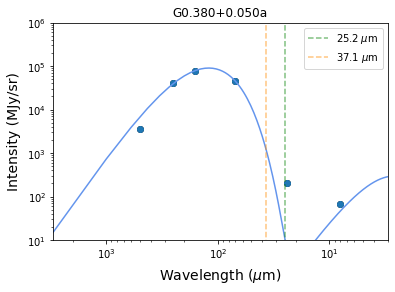

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


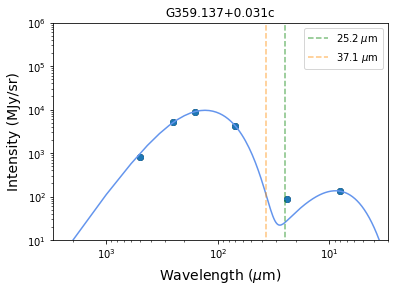

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


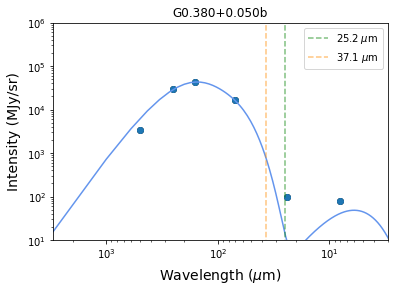

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


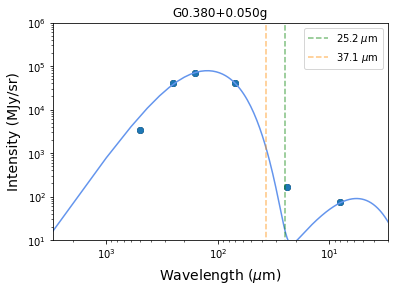

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


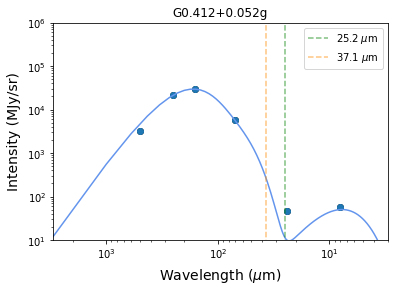

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


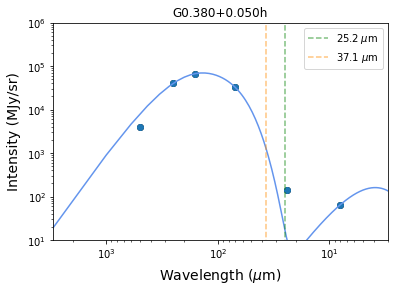

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


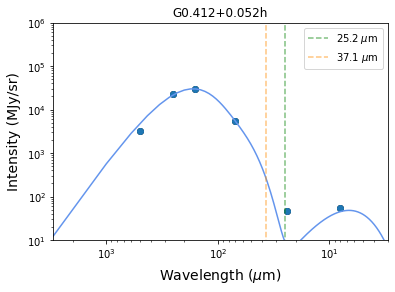

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


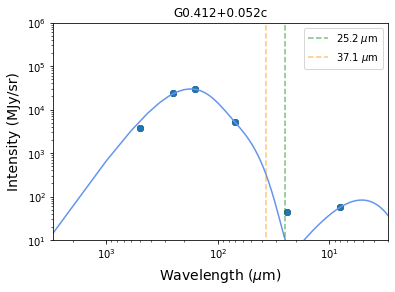

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


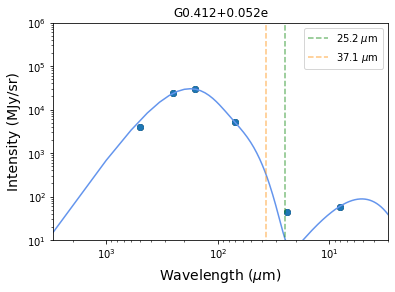

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


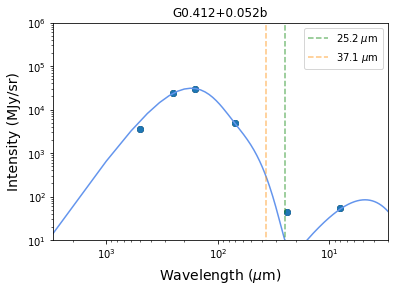

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


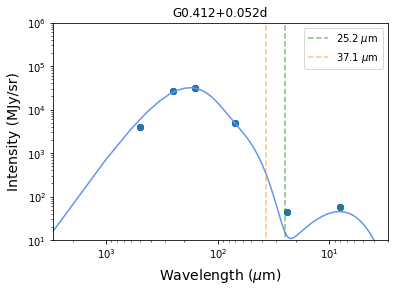

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


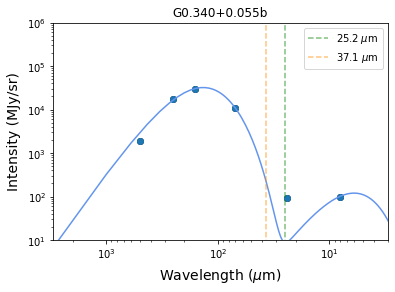

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


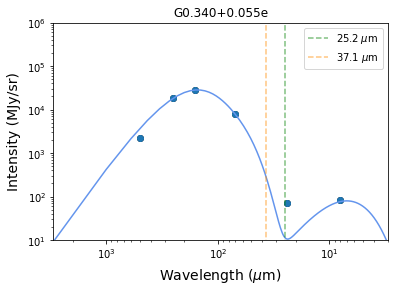

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


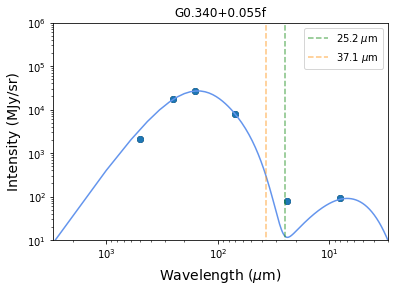

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


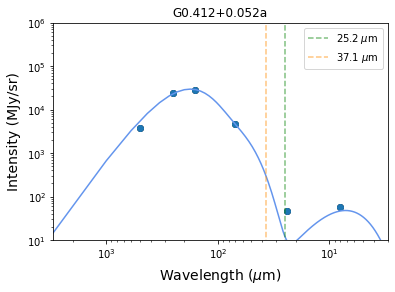

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


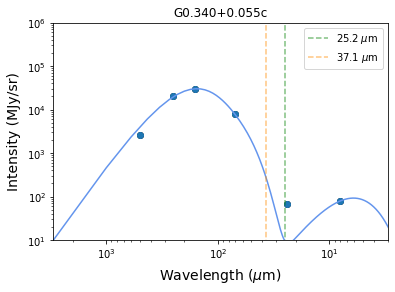

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


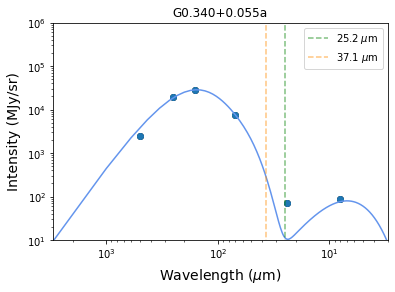

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


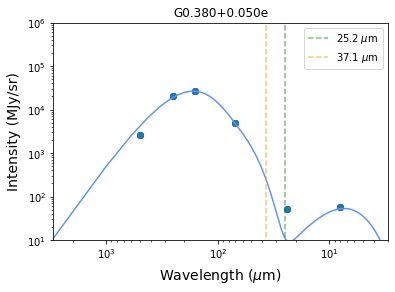

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


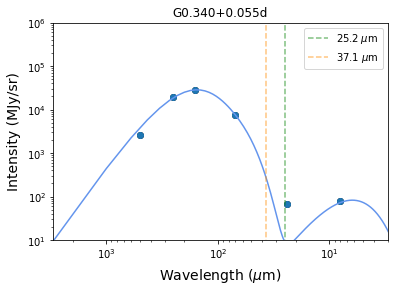

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


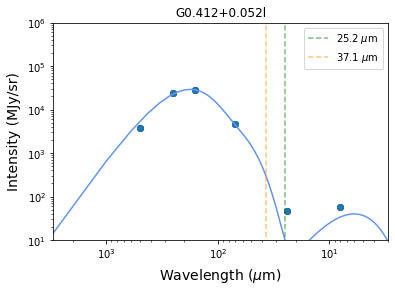

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


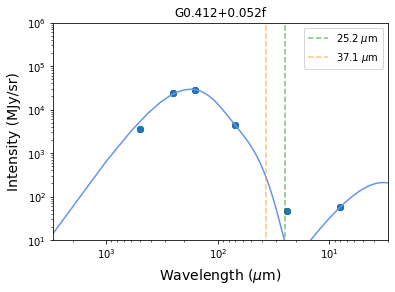

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


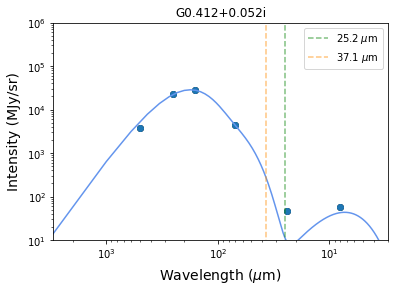

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


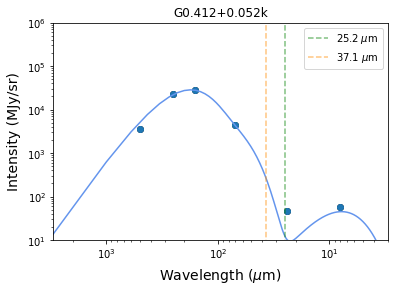

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in exp
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:14: RuntimeWarning: overflow encountered in multiply
  F_l     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_l)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in exp
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2264127439.py:15: RuntimeWarning: overflow encountered in multiply
  F_m     = 2*h*freq**3 / (c**2 * (np.exp(h*freq / (k*T_m)) - 1))


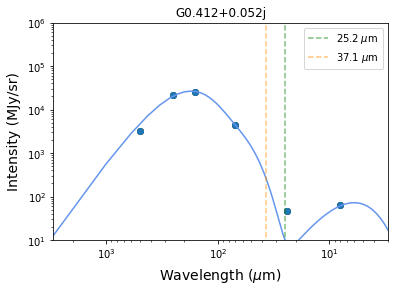

In [67]:
 for i in range(len(L3)):
    
    ycurve_noisy_comb= blackbody_freq_C(curve_freqs, T_l = fit_comb_T_l[i],
                                         N_l = fit_comb_N_l[i], T_h = fit_comb_T_h[i], 
                                         N_h = fit_comb_N_h[i], N_m = fit_comb_N_m[i], 
                                        T_m = fit_comb_T_m[i])   
    plt.plot(1.0e6*clight/real_freqs, LF_Arr[i], 'o')
    plt.scatter(1.0e6*clight/real_freqs, LF_Arr[i], color='k')
    plt.plot(1.0e6*clight/curve_freqs, ycurve_noisy_comb, color='cornflowerblue',ls='-')
    plt.plot([25.2,25.2],[0.001,1000000],color='green',ls='--',alpha=0.5, label= '25.2 $\mu$m')
    plt.plot([37.1,37.1],[0.001,1000000],color='darkorange',ls='--',alpha=0.5, label='37.1 $\mu$m')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(10,1000000)
    plt.xlim(1.0e6*clight/1.0e11,1.0e6*clight/1.0e14)
    plt.xlabel('Wavelength ($\mu$m)', labelpad=6, fontsize=14)
    plt.ylabel('Intensity (MJy/sr)', labelpad=6, fontsize=14)
    plt.legend(loc='best')
    plt.title((L3_ID[i]))
    #plt.savefig(f'C:/Downloads/IGNITES_regrid_reconvolve(3)/{catalog['leaf_ID'][i]}_Fit_Image.png')
    #plt.close()
    plt.show()

In [11]:
L3_ID = np.array(catalog['leaf_ID'][np.isin(catalog['index'], L3)],dtype=str)
Core_State = catalog['SF_final_say'][np.isin(catalog['index'], L3)]
# 1 is star forming, 2 is ambiguoius, 0 is quiescient 

In [18]:
    LF = LF_Arr 
    TL = np.around(fit_comb_T_l, 2)
    TM = np.around(fit_comb_T_m, 2)
    TH = np.around(fit_comb_T_h, 2)
    NL = np.around(fit_comb_N_l)
    NM = np.around(fit_comb_N_m)
    NH = np.around(fit_comb_N_h)
    
    UN_TL = np.around(uncert_T_l)
    UN_TM = np.around(uncert_T_m)
    UN_TH = np.around(uncert_T_h)
    UN_NL = np.around(uncert_N_l)
    UN_NM = np.around(uncert_N_m)
    UN_NH = np.around(uncert_N_h)
    RL = L3
    CS = Core_State
    
t = QTable([RL, TL, TM, TH, NL, NM, NH, UN_TL, UN_TM, UN_TH, UN_NL, UN_NM, UN_NH],
           names=('Leaf ID', 'Low Temp', 'Mid Temp', 'High Temp', 
                  'Low Temp N', 'Mid Temp N', 'High Temp N', 
                  'Low Temp Uncert.', 'Mid Temp Uncert.', 'High Temp Uncert.', 
                  'Low Temp N Uncert.', 'Mid Temp N Uncert.', 'High Temp N Uncert.'),
           meta={'name': 'Core Catalog'})
t

<QTable length=285>
Leaf ID Low Temp Mid Temp ...   Mid Temp N Uncert.    High Temp N Uncert.  
 int64  float64  float64  ...        float64                float64        
------- -------- -------- ... ---------------------- ----------------------
     99    17.81    29.51 ... 1.8596269256067915e+25  3.773217791028244e+19
    118    16.07    31.88 ...  6.551042563508723e+25  9.635624987953787e+18
    122    17.01    31.36 ...  5.501239892064627e+25  7.449476328634045e+19
    325    16.97    28.54 ... 2.3314872060625608e+25  4.433131138303652e+19
    374     18.1    28.39 ... 3.6006710526395967e+25  5.300303135964534e+19
    381     10.0    34.97 ...   6.61461680932941e+24 1.0730012793519494e+20
    400    34.65     32.4 ...  2.637511788761828e+26 1.0939598585346413e+20
    415    12.59    32.04 ... 1.2171592765028337e+25 1.2109575920797806e+20
    424    14.11    32.35 ... 3.3156483914551287e+25   6.39024985782705e+19
    428    13.29    31.92 ...  1.991624763476886e+25 1.5315341853861007e+20
    ...      ...      ... ...                    ...                    ...
  24103    18.07    33.41 ... 1.1178246600317479e+25  2.461744867361134e+19
  24109    19.53    30.57 ...  2.834482813899192e+25 1.6209551681028207e+19
  24139     19.3    30.57 ... 3.2654470849051477e+25  3.385152903563364e+19
  24194    18.76    32.69 ... 1.5231102695120253e+25 3.5640823927781863e+19
  24215    19.29    30.38 ...  3.241070745533538e+25 1.5067251274580236e+19
  24244    18.09    33.73 ...  2.099960017638508e+25  2.534862595184875e+19
  24250    18.16    33.65 ...                    nan                    nan
  24280    18.08     33.4 ... 1.0564391617222239e+25  2.178699987945417e+19
  24310    18.18    33.43 ... 1.1071030832724508e+25  4.586383695800096e+19
  24368    18.15    33.04 ...  9.835814976156896e+24  8.641342283562955e+18

In [19]:
print('NH Values')
print(min(NH))
print(max(NH))
print('TH Values')
print(min(TH))
print(max(TH))
print('NM Values')
print(min(NM))
print(max(NM))
print('TM Values')
print(min(TM))
print(max(TM))
print('NL Values')
print(min(NL))
print(max(NL))
print('TL Values')
print(max(TL))
print(min(TL))

NH Values
134613425556031.0
6.452902857163827e+23
TH Values
10.02
2994.15
NM Values
1.897642591218241e+21
6.36909088488806e+25
TM Values
25.91
85.1
NL Values
2.175152211258304e+25
4.570100505928541e+27
TL Values
34.65
10.0


In [28]:
data = {'Galactic Coords.':L3_ID,
        'Leaf ID': RL,
        'Low Temp':TL,
        'Mid Temp':TM,
        'High Temp':TH,
        'Low Temp N':NL,
        'Mid Temp N':NM,
        'High Temp N':NH,
        'Core State':CS
       }
df = pd.DataFrame(data)
df.to_csv('./HML_SED_Table_all_24um_final.csv', sep=' ')
print(df.to_string())

     Galactic Coords.  Leaf ID  Low Temp  Mid Temp  High Temp    Low Temp N    Mid Temp N   High Temp N  Core State
0     G359.615-0.243c       99     17.81     29.51     255.33  1.139044e+26  5.954094e+24  7.872997e+18         1.0
1     G359.615-0.243a      118     16.07     31.88     817.36  2.549267e+26  6.369091e+25  5.537808e+16         1.0
2     G359.615-0.243b      122     17.01     31.36     454.78  2.873852e+26  3.343064e+25  4.576832e+17         1.0
3       G0.316-0.201c      325     16.97     28.54     232.84  5.903070e+25  1.089390e+25  1.570134e+19         1.0
4       G0.316-0.201e      374     18.10     28.39     233.32  8.291098e+25  1.157303e+25  1.611535e+19         0.0
5       G0.316-0.201g      381     10.00     34.97     475.00  9.730991e+25  2.731402e+25  2.897648e+18         1.0
6       G0.316-0.201a      400     34.65     32.40     512.74  4.719572e+25  1.897643e+21  1.059683e+18         1.0
7       G0.316-0.201k      415     12.59     32.04     268.19  1.156198e

In [29]:
catalog.keys()

['index',
 'area_ellipse',
 'area_exact',
 'flux_integrated',
 'major_sigma',
 'minor_sigma',
 'position_angle',
 'radius',
 'glon',
 'glat',
 'r_eff',
 'flux_integrated_bgsub',
 'min_flux_integrated',
 'noise',
 'peak_cont_flux',
 'min_cont_flux',
 'mean_cont_flux',
 'npix',
 'DustTemperature',
 'herschel_column',
 'mass',
 'sma_column',
 'r_eff_pc',
 'Sigma',
 'n',
 'rho',
 'tff',
 'glon_0',
 'mass_bgsub',
 'suspicious',
 'leaf_ID',
 'mask_num',
 'mass_unc',
 'N_unc',
 'n_unc',
 'rho_unc',
 'tff_unc',
 'mass_bgsub_unc',
 'atoll_final_say',
 'SF_final_say',
 '8um_point_hph',
 '20-24um_point_hph',
 '70um_point_hph',
 'YSO_hph',
 'Walsh+2014_h2o_maser_hph',
 'Caswell+2012_methanol_maser_hph',
 'Gutermuth+2015_24um_point_hph',
 'Molinari+2016_70um_point_hph',
 'SF_any_all_hph',
 'SF_any_certain_hph',
 '8um_point_brian',
 '20-24um_point_brian',
 '70um_point_brian',
 'YSO_brian',
 'Walsh+2014_h2o_maser_brian',
 'Caswell+2012_methanol_maser_brian',
 'Gutermuth+2015_24um_point_brian',
 'Moli

In [30]:
col0 = fits.Column(name='Gal. coords.', format='16A', array= L3_ID)
col1 = fits.Column(name='Gal. long.', format='E', array= catalog['glon'])
col2 = fits.Column(name='Gal. lat.', format='E',  array= catalog['glat'])
col3 = fits.Column(name='Low Temp', format='E', array=TL)
col4 = fits.Column(name='Mid Temp', format='E', array=TM)
col5 = fits.Column(name='High Temp', format='E', array=TH)
col6 = fits.Column(name='Low Temp N', format='E', array=NL)
col7 = fits.Column(name='Mid Temp N', format='E', array=NM)
col8 = fits.Column(name='High Temp N', format='E', array=NH)
col9 = fits.Column(name='Low Temp Uncert.', format='E', array=UN_TL)
col10 = fits.Column(name='Mid Temp Uncert.', format='E', array=UN_TM)
col11 = fits.Column(name='High Temp Uncert.', format='E', array=UN_TH)
col12 = fits.Column(name='Low Temp N Uncert.', format='E', array=UN_NL)
col13 = fits.Column(name='Mid Temp N Uncert.', format='E', array=UN_NM)
col14 = fits.Column(name='High Temp N Uncert.', format='E', array=UN_NH)

FitsTable = fits.ColDefs([col0, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14])
hdu = fits.BinTableHDU.from_columns(FitsTable)

In [31]:
overwrite=True
hdu.writeto('SED_Fit_Table_Final.fits')

OSError: File SED_Fit_Table_Final.fits already exists. If you mean to replace it then use the argument "overwrite=True".

In [50]:
NL_0 = (NL[np.where(Core_State == 0)])
NL_1 = (NL[np.where(Core_State == 1)])
NL_2 = (NL[np.where(Core_State == 2)])

TL_0 = (TL[np.where(Core_State == 0)])
TL_1 = (TL[np.where(Core_State == 1)])
TL_2 = (TL[np.where(Core_State == 2)])

UN_TL0 = (UN_TL[[np.where(Core_State == 0)]])
UN_TL1 = (UN_TL[[np.where(Core_State == 1)]])
UN_TL2 = (UN_TL[[np.where(Core_State == 2)]])

UN_NL0 = (UN_NL[[np.where(Core_State == 0)]])
UN_NL1 = (UN_NL[[np.where(Core_State == 1)]])
UN_NL2 = (UN_NL[[np.where(Core_State == 2)]])

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\3561815183.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TL0 = (UN_TL[[np.where(Core_State == 0)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\3561815183.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TL1 = (UN_TL[[np.where(Core_State == 1)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\3561815183.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

In [51]:
Avg_CSL0 = np.median(NL[np.where(Core_State == 0)])
Avg_CSL1 = np.median(NL[np.where(Core_State == 1)])
Avg_CSL2 = np.median(NL[np.where(Core_State == 2)])

Avg_TL0 = np.median(TL[np.where(Core_State == 0)])
Avg_TL1 = np.median(TL[np.where(Core_State == 1)])
Avg_TL2 = np.median(TL[np.where(Core_State == 2)])

[]

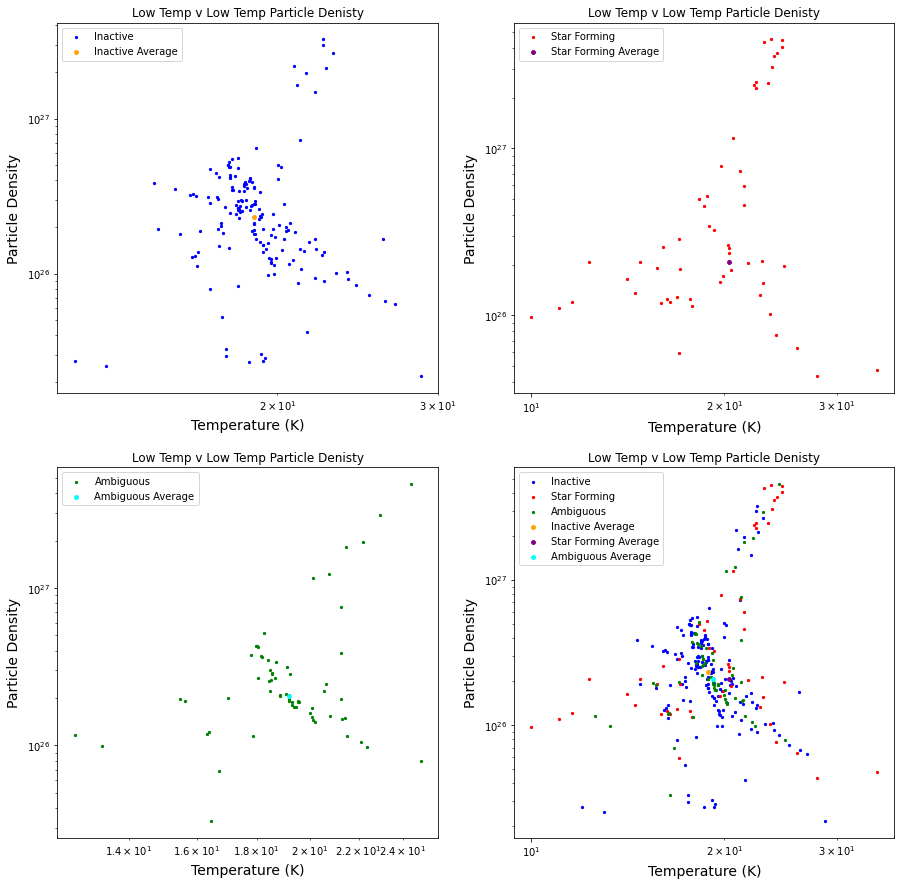

In [52]:

f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
ax[1,1].scatter(TL_0, NL_0, color='blue', s=5, label = 'Inactive')
ax[1,1].scatter(TL_1, NL_1, color='red', s=5, label = 'Star Forming' )
ax[1,1].scatter(TL_2, NL_2, color='green', s=5, label = 'Ambiguous')
ax[0,0].scatter(TL_0, NL_0, color='blue', s=5, label = 'Inactive')
ax[0,1].scatter(TL_1, NL_1, color='red', s=5, label = 'Star Forming' )
ax[1,0].scatter(TL_2, NL_2, color='green', s=5, label = 'Ambiguous')

ax[0,0].scatter(Avg_TL0, Avg_CSL0, color='orange', s=15, label = 'Inactive Average')
ax[0,1].scatter(Avg_TL1, Avg_CSL1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,0].scatter(Avg_TL2, Avg_CSL2, color='cyan', s=15, label = 'Ambiguous Average')

ax[1,1].scatter(Avg_TL0, Avg_CSL0, color='orange', s=15, label = 'Inactive Average')
ax[1,1].scatter(Avg_TL1, Avg_CSL1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,1].scatter(Avg_TL2, Avg_CSL2, color='cyan', s=15, label = 'Ambiguous Average')

#plt.xlim(-10, 200)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
#plt.ylim(10e21, 10e28)
ax[0,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,0].set_title('Low Temp v Low Temp Particle Denisty')
ax[0,1].set_title('Low Temp v Low Temp Particle Denisty')
ax[1,0].set_title('Low Temp v Low Temp Particle Denisty')
ax[1,1].set_title('Low Temp v Low Temp Particle Denisty')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
f.set_figheight(15)
f.set_figwidth(15)
plt.plot()

In [53]:
NM_0 = (NM[np.where(Core_State == 0)])
NM_1 = (NM[np.where(Core_State == 1)])
NM_2 = (NM[np.where(Core_State == 2)])

TM_0 = (TM[np.where(Core_State == 0)])
TM_1 = (TM[np.where(Core_State == 1)])
TM_2 = (TM[np.where(Core_State == 2)])

UN_TM0 = (UN_TM[[np.where(Core_State == 0)]])
UN_TM1 = (UN_TM[[np.where(Core_State == 1)]])
UN_TM2 = (UN_TM[[np.where(Core_State == 2)]])

UN_NM0 = (UN_NM[[np.where(Core_State == 0)]])
UN_NM1 = (UN_NM[[np.where(Core_State == 1)]])
UN_NM2 = (UN_NM[[np.where(Core_State == 2)]])

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2443783471.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TM0 = (UN_TM[[np.where(Core_State == 0)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2443783471.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TM1 = (UN_TM[[np.where(Core_State == 1)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\2443783471.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

In [36]:
Avg_CSM0 = np.median(NM[np.where(Core_State == 0)])
Avg_CSM1 = np.median(NM[np.where(Core_State == 1)])
Avg_CSM2 = np.median(NM[np.where(Core_State == 2)])

Avg_TM0 = np.median(TM[np.where(Core_State == 0)])
Avg_TM1 = np.median(TM[np.where(Core_State == 1)])
Avg_TM2 = np.median(TM[np.where(Core_State == 2)])

[]

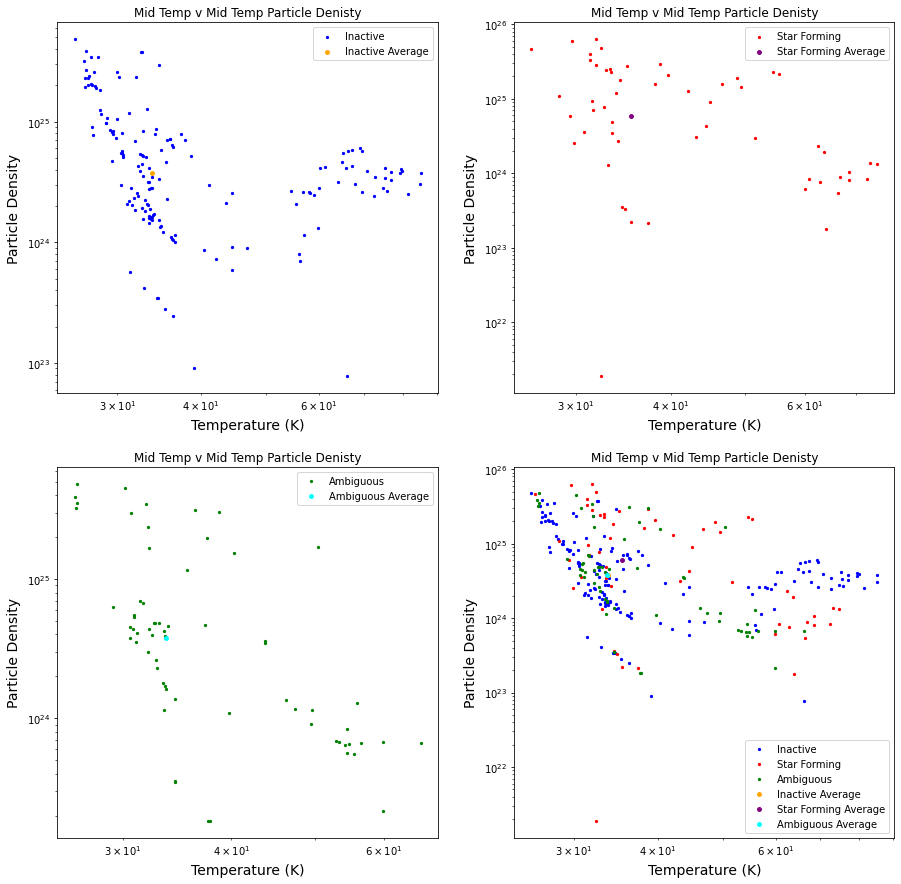

In [37]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
ax[1,1].scatter(TM_0, NM_0, color='blue', s=5, label = 'Inactive')
ax[1,1].scatter(TM_1, NM_1, color='red', s=5, label = 'Star Forming' )
ax[1,1].scatter(TM_2, NM_2, color='green', s=5, label = 'Ambiguous')
ax[0,0].scatter(TM_0, NM_0, color='blue', s=5, label = 'Inactive')
ax[0,1].scatter(TM_1, NM_1, color='red', s=5, label = 'Star Forming' )
ax[1,0].scatter(TM_2, NM_2, color='green', s=5, label = 'Ambiguous')

ax[0,0].scatter(Avg_TM0, Avg_CSM0, color='orange', s=15, label = 'Inactive Average')
ax[0,1].scatter(Avg_TM1, Avg_CSM1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,0].scatter(Avg_TM2, Avg_CSM2, color='cyan', s=15, label = 'Ambiguous Average')

ax[1,1].scatter(Avg_TM0, Avg_CSM0, color='orange', s=15, label = 'Inactive Average')
ax[1,1].scatter(Avg_TM1, Avg_CSM1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,1].scatter(Avg_TM2, Avg_CSM2, color='cyan', s=15, label = 'Ambiguous Average')

#plt.xlim(-10, 200)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
#plt.ylim(10e21, 10e28)
ax[0,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,0].set_title('Mid Temp v Mid Temp Particle Denisty')
ax[0,1].set_title('Mid Temp v Mid Temp Particle Denisty')
ax[1,0].set_title('Mid Temp v Mid Temp Particle Denisty')
ax[1,1].set_title('Mid Temp v Mid Temp Particle Denisty')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
f.set_figheight(15)
f.set_figwidth(15)
plt.plot()

In [54]:
NH_0 = (NH[np.where(Core_State == 0)])
NH_1 = (NH[np.where(Core_State == 1)])
NH_2 = (NH[np.where(Core_State == 2)])

TH_0 = (TH[np.where(Core_State == 0)])
TH_1 = (TH[np.where(Core_State == 1)])
TH_2 = (TH[np.where(Core_State == 2)])

UN_TH0 = (UN_TH[[np.where(Core_State == 0)]])
UN_TH1 = (UN_TH[[np.where(Core_State == 1)]])
UN_TH2 = (UN_TH[[np.where(Core_State == 2)]])

UN_NH0 = (UN_NH[[np.where(Core_State == 0)]])
UN_NH1 = (UN_NH[[np.where(Core_State == 1)]])
UN_NH2 = (UN_NH[[np.where(Core_State == 2)]])

C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\1641299114.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TH0 = (UN_TH[[np.where(Core_State == 0)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\1641299114.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  UN_TH1 = (UN_TH[[np.where(Core_State == 1)]])
C:\Users\xavst\AppData\Local\Temp\ipykernel_12260\1641299114.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

In [39]:
Avg_CSH0 = np.median(NH[np.where(Core_State == 0)])
Avg_CSH1 = np.median(NH[np.where(Core_State == 1)])
Avg_CSH2 = np.median(NH[np.where(Core_State == 2)])

Avg_TH0 = np.median(TH[np.where(Core_State == 0)])
Avg_TH1 = np.median(TH[np.where(Core_State == 1)])
Avg_TH2 = np.median(TH[np.where(Core_State == 2)])

[]

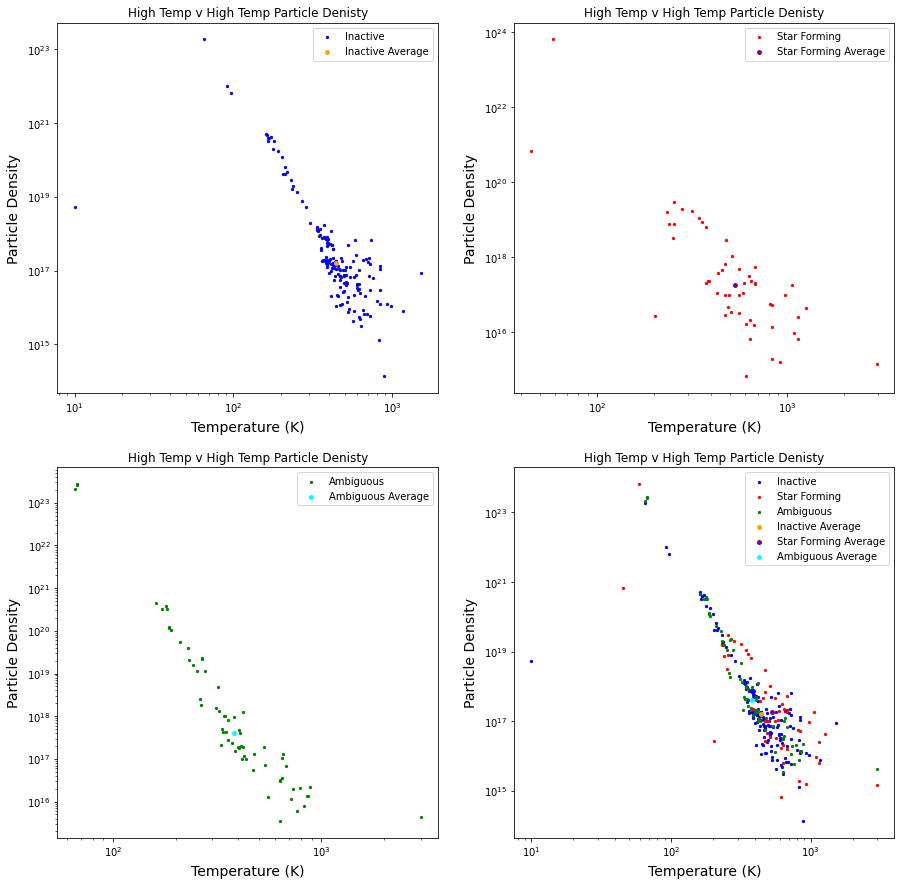

In [40]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
ax[1,1].scatter(TH_0, NH_0, color='blue', s=5, label = 'Inactive')
ax[1,1].scatter(TH_1, NH_1, color='red', s=5, label = 'Star Forming' )
ax[1,1].scatter(TH_2, NH_2, color='green', s=5, label = 'Ambiguous')
ax[0,0].scatter(TH_0, NH_0, color='blue', s=5, label = 'Inactive')
ax[0,1].scatter(TH_1, NH_1, color='red', s=5, label = 'Star Forming' )
ax[1,0].scatter(TH_2, NH_2, color='green', s=5, label = 'Ambiguous')

ax[0,0].scatter(Avg_TH0, Avg_CSH0, color='orange', s=15, label = 'Inactive Average')
ax[0,1].scatter(Avg_TH1, Avg_CSH1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,0].scatter(Avg_TH2, Avg_CSH2, color='cyan', s=15, label = 'Ambiguous Average')

ax[1,1].scatter(Avg_TH0, Avg_CSH0, color='orange', s=15, label = 'Inactive Average')
ax[1,1].scatter(Avg_TH1, Avg_CSH1, color='purple', s=15, label = 'Star Forming Average' )
ax[1,1].scatter(Avg_TH2, Avg_CSH2, color='cyan', s=15, label = 'Ambiguous Average')

#plt.xlim(-10, 200)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
#plt.ylim(10e21, 10e28)
ax[0,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,0].set_title('High Temp v High Temp Particle Denisty')
ax[0,1].set_title('High Temp v High Temp Particle Denisty')
ax[1,0].set_title('High Temp v High Temp Particle Denisty')
ax[1,1].set_title('High Temp v High Temp Particle Denisty')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
f.set_figheight(15)
f.set_figwidth(15)
plt.plot()

In [41]:
NT_0 = (NL[np.where(Core_State == 0)]), (NM[np.where(Core_State == 0)]), (NH[np.where(Core_State == 0)])
NT_1 = (NL[np.where(Core_State == 1)]), (NM[np.where(Core_State == 1)]), (NH[np.where(Core_State == 1)])
NT_2 = (NL[np.where(Core_State == 2)]), (NM[np.where(Core_State == 2)]), (NH[np.where(Core_State == 2)])

TT_0 = (TL[np.where(Core_State == 0)]), (TM[np.where(Core_State == 0)]), (TH[np.where(Core_State == 0)])
TT_1 = (TL[np.where(Core_State == 1)]), (TM[np.where(Core_State == 1)]), (TH[np.where(Core_State == 1)])
TT_2 = (TL[np.where(Core_State == 2)]), (TM[np.where(Core_State == 2)]), (TH[np.where(Core_State == 2)])

[]

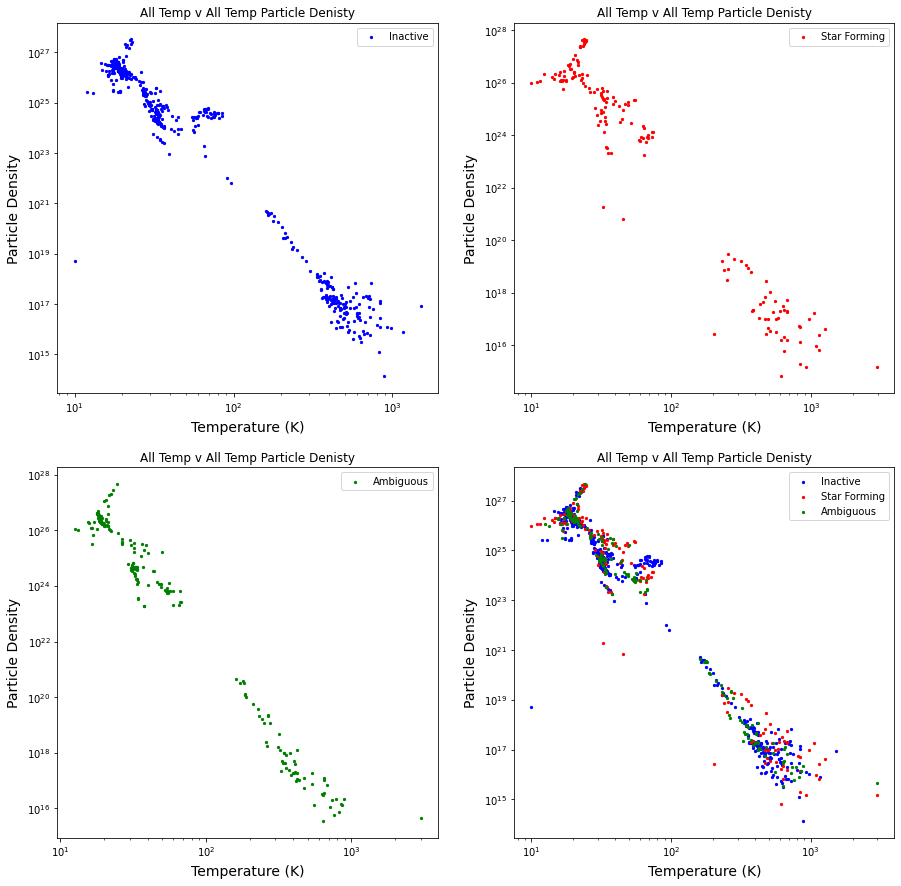

In [42]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
ax[1,1].scatter(TT_0, NT_0, color='blue', s=5, label = 'Inactive')
ax[1,1].scatter(TT_1, NT_1, color='red', s=5, label = 'Star Forming' )
ax[1,1].scatter(TT_2, NT_2, color='green', s=5, label = 'Ambiguous')
ax[0,0].scatter(TT_0, NT_0, color='blue', s=5, label = 'Inactive')
ax[0,1].scatter(TT_1, NT_1, color='red', s=5, label = 'Star Forming' )
ax[1,0].scatter(TT_2, NT_2, color='green', s=5, label = 'Ambiguous')
#plt.xlim(-10, 200)
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
#plt.ylim(10e21, 10e28)
ax[0,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,0].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[1,1].set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax[0,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,0].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[1,1].set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax[0,0].set_title('All Temp v All Temp Particle Denisty')
ax[0,1].set_title('All Temp v All Temp Particle Denisty')
ax[1,0].set_title('All Temp v All Temp Particle Denisty')
ax[1,1].set_title('All Temp v All Temp Particle Denisty')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
f.set_figheight(15)
f.set_figwidth(15)
plt.plot()

[]

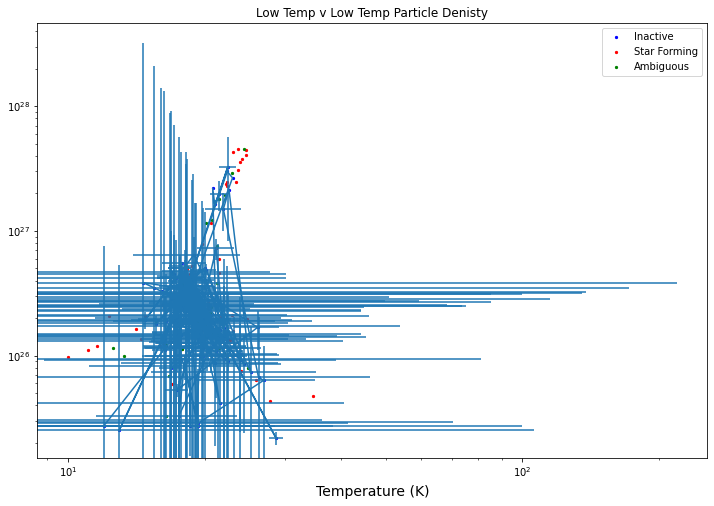

In [60]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax.scatter(TL_0, NL_0, color='blue', s=5, label = 'Inactive')
ax.errorbar(TL_0, NL_0, yerr = UN_NL0, xerr = UN_TL0, )
ax.scatter(TL_1, NL_1, color='red', s=5, label = 'Star Forming' )
ax.scatter(TL_2, NL_2, color='green', s=5, label = 'Ambiguous')
ax.set_yscale('log')
ax.set_xscale('log')
ax.
ax.set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax.set_title('Low Temp v Low Temp Particle Denisty')
ax.legend()
plt.plot()

[]

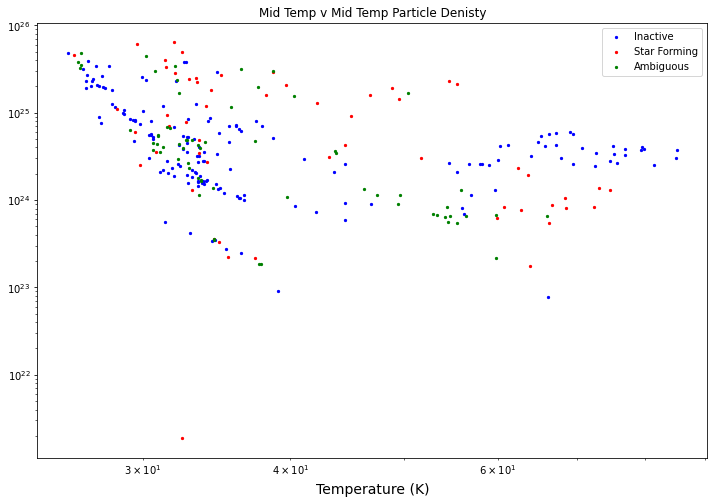

In [44]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax.scatter(TM_0, NM_0, color='blue', s=5, label = 'Inactive')
ax.scatter(TM_1, NM_1, color='red', s=5, label = 'Star Forming' )
ax.scatter(TM_2, NM_2, color='green', s=5, label = 'Ambiguous')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax.set_title('Mid Temp v Mid Temp Particle Denisty')
ax.legend()
plt.plot()

[]

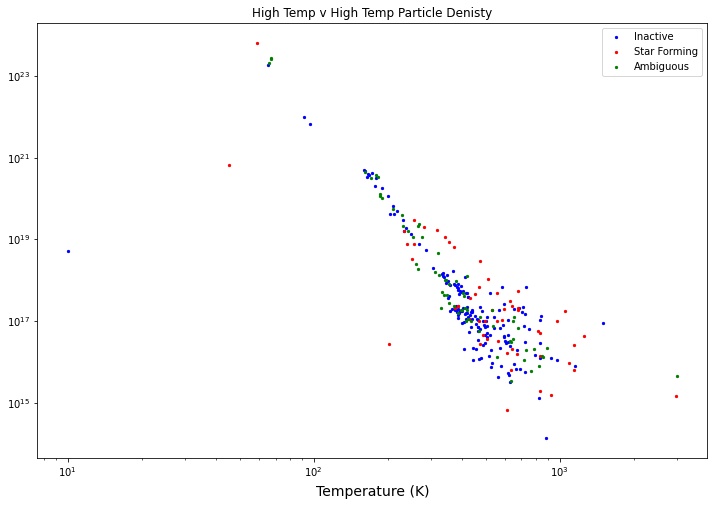

In [45]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax.scatter(TH_0, NH_0, color='blue', s=5, label = 'Inactive')
ax.scatter(TH_1, NH_1, color='red', s=5, label = 'Star Forming' )
ax.scatter(TH_2, NH_2, color='green', s=5, label = 'Ambiguous')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax.set_title('High Temp v High Temp Particle Denisty')
ax.legend()
plt.plot()

[]

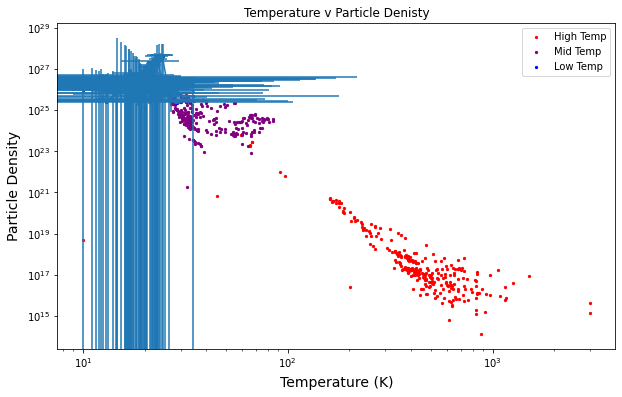

In [66]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
 
ax.scatter(TH, NH, color='red', label = 'High Temp', s=5)
ax.errorbar(TL, NL, UN_NL, UN_TL)
ax.scatter(TM, NM, color='purple', label = 'Mid Temp', s=5)
ax.scatter(TL, NL, color='blue', label = 'Low Temp', s=5)
#ax.set_xlim(10, 105)
#ax.set_ylim(10e14, 10e27)
ax.set_xlabel('Temperature (K)', labelpad=6, fontsize=14)
ax.set_ylabel('Particle Density', labelpad=6, fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Temperature v Particle Denisty')
ax.legend()
plt.savefig('Temp_Dens_plot.png')
plt.plot()

In [155]:
print('Averages')
print('SF Regions')
print('Low Temp:')
print(Avg_TL1, Avg_CSL1)
print('Mid Temp:')
print(Avg_TM1, Avg_CSM1)
print('High Temp:')
print(Avg_TH1, Avg_CSH1)

print('Non SF Regions')
print('Low Temp:')
print(Avg_TL0, Avg_CSL0)
print('Mid Temp:')
print(Avg_TM0, Avg_CSM0)
print('High Temp:')
print(Avg_TH0, Avg_CSH0)

print('Uncertain Regions')
print('Low Temp:')
print(Avg_TL2, Avg_CSL2)
print('Mid Temp:')
print(Avg_TM2, Avg_CSM2)
print('High Temp:')
print(Avg_TH2, Avg_CSH2)

Averages
SF Regions
Low Temp:
20.33 2.0927408932868152e+26
Mid Temp:
35.44 5.954093610149262e+24
High Temp:
531.71 1.8321476203677056e+17
Non SF Regions
Low Temp:
18.84 2.3133518732920056e+26
Mid Temp:
33.73 3.7737335549889244e+24
High Temp:
438.66 1.5789536684156326e+17
Uncertain Regions
Low Temp:
19.2 2.0645878126117783e+26
Mid Temp:
33.63 3.75734170822467e+24
High Temp:
379.55 4.117100771143563e+17


In [106]:
x = L3[np.where(Core_State==0)]
y = L3[np.where(Core_State==1)]
z = L3[np.where(Core_State==2)]

ABBA_0 = catalog['DustTemperature'][np.isin(catalog['index'], x)]
ABBA_1 = catalog['DustTemperature'][np.isin(catalog['index'], y)]
ABBA_2 = catalog['DustTemperature'][np.isin(catalog['index'], z)]
DunkinDonuts = catalog['herschel_column'][np.isin(catalog['index'], L3)]*10000

[]

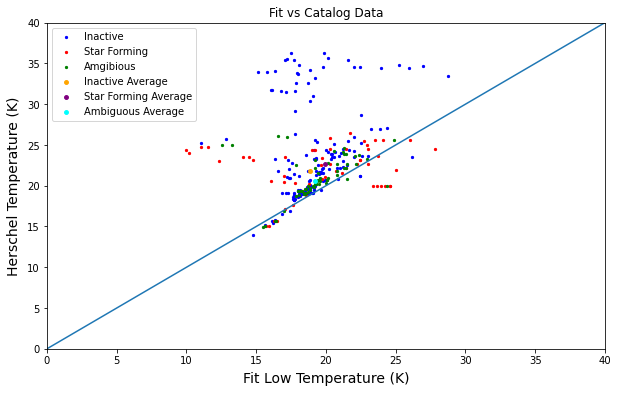

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(TL_0, ABBA_0, color='blue', label = 'Inactive', s=5)
ax.scatter(TL_1, ABBA_1, color='red', label = 'Star Forming', s=5)
ax.scatter(TL_2, ABBA_2, color='green', label = 'Amgibious', s=5)
ax.scatter(Avg_TL0, np.median(ABBA_0), color='orange', s=15, label = 'Inactive Average')
ax.scatter(Avg_TL1, np.median(ABBA_1), color='purple', s=15, label = 'Star Forming Average' )
ax.scatter(Avg_TL2, np.median(ABBA_2), color='cyan', s=15, label = 'Ambiguous Average')
ax.axline((0, 0), slope=1)
#MT = plt.scatter(t['Mid Temp'], ABBA, color='purple', label = 'Mid Temp Fit', s=5, marker = 'x')
#HD = plt.scatter(ABBA, ABBA, color='red', label = 'Herschel Column', s=10, marker = '*')
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
ax.set_xlabel('Fit Low Temperature (K)', labelpad=6, fontsize=14)
ax.set_ylabel('Herschel Temperature (K)', labelpad=6, fontsize=14)
#plt.yscale('log')
#plt.xscale('log')
ax.set_title('Fit vs Catalog Data')
#plt.figure(figsize = (10,6))
plt.legend()
plt.plot()

In [108]:
x = L3[np.where(Core_State==0)]
y = L3[np.where(Core_State==1)]
z = L3[np.where(Core_State==2)]

MASS_0 = catalog['mass'][np.isin(catalog['index'], x)]
MASS_1 = catalog['mass'][np.isin(catalog['index'], y)]
MASS_2 = catalog['mass'][np.isin(catalog['index'], z)]
DunkinDonuts = catalog['herschel_column'][np.isin(catalog['index'], L3)]*10000

[]

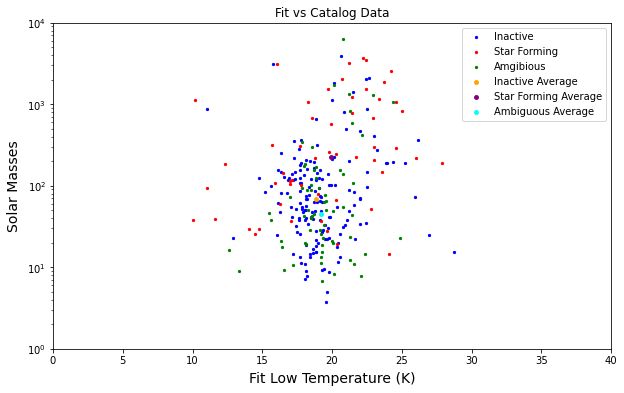

In [109]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(TL_0, MASS_0, color='blue', label = 'Inactive', s=5)
ax.scatter(TL_1, MASS_1, color='red', label = 'Star Forming', s=5)
ax.scatter(TL_2, MASS_2, color='green', label = 'Amgibious', s=5)
ax.scatter(Avg_TL0, np.median(MASS_0), color='orange', s=15, label = 'Inactive Average')
ax.scatter(Avg_TL1, np.median(MASS_1), color='purple', s=15, label = 'Star Forming Average' )
ax.scatter(Avg_TL2, np.median(MASS_2), color='cyan', s=15, label = 'Ambiguous Average')
#ax.axline((0, 0), slope=1)
#MT = plt.scatter(t['Mid Temp'], ABBA, color='purple', label = 'Mid Temp Fit', s=5, marker = 'x')
#HD = plt.scatter(ABBA, ABBA, color='red', label = 'Herschel Column', s=10, marker = '*')
ax.set_xlim(0, 40)
ax.set_ylim(1, 10000)
ax.set_xlabel('Fit Low Temperature (K)', labelpad=6, fontsize=14)
ax.set_ylabel('Solar Masses', labelpad=6, fontsize=14)
plt.yscale('log')
#plt.xscale('log')
ax.set_title('Fit vs Catalog Data')
#plt.figure(figsize = (10,6))
plt.legend()
plt.plot()

In [110]:
x = L3[np.where(Core_State==0)]
y = L3[np.where(Core_State==1)]
z = L3[np.where(Core_State==2)]

REFF_0 = catalog['r_eff_pc'][np.isin(catalog['index'], x)]
REFF_1 = catalog['r_eff_pc'][np.isin(catalog['index'], y)]
REFF_2 = catalog['r_eff_pc'][np.isin(catalog['index'], z)]
DunkinDonuts = catalog['herschel_column'][np.isin(catalog['index'], L3)]*10000

[]

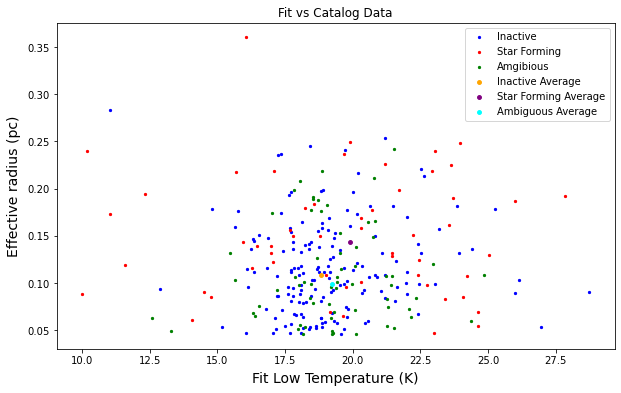

In [111]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(TL_0, REFF_0, color='blue', label = 'Inactive', s=5)
ax.scatter(TL_1, REFF_1, color='red', label = 'Star Forming', s=5)
ax.scatter(TL_2, REFF_2, color='green', label = 'Amgibious', s=5)
ax.scatter(Avg_TL0, np.median(REFF_0), color='orange', s=15, label = 'Inactive Average')
ax.scatter(Avg_TL1, np.median(REFF_1), color='purple', s=15, label = 'Star Forming Average' )
ax.scatter(Avg_TL2, np.median(REFF_2), color='cyan', s=15, label = 'Ambiguous Average')
#ax.axline((0, 0), slope=1)
#MT = plt.scatter(t['Mid Temp'], ABBA, color='purple', label = 'Mid Temp Fit', s=5, marker = 'x')
#HD = plt.scatter(ABBA, ABBA, color='red', label = 'Herschel Column', s=10, marker = '*')
#ax.set_xlim(0, 40)
#ax.set_ylim(1, 10000)
ax.set_xlabel('Fit Low Temperature (K)', labelpad=6, fontsize=14)
ax.set_ylabel('Effective radius (pc)', labelpad=6, fontsize=14)
#plt.yscale('log')
#plt.xscale('log')
ax.set_title('Fit vs Catalog Data')
#plt.figure(figsize = (10,6))
plt.legend()
plt.plot()

[]

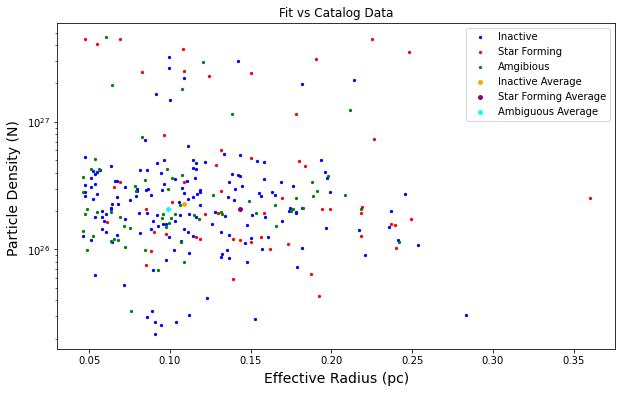

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(REFF_0, NL_0, color='blue', label = 'Inactive', s=5)
ax.scatter(REFF_1, NL_1, color='red', label = 'Star Forming', s=5)
ax.scatter(REFF_2, NL_2, color='green', label = 'Amgibious', s=5)

ax.scatter(np.median(REFF_0), Avg_CSL0, color='orange', s=15, label = 'Inactive Average')
ax.scatter(np.median(REFF_1), Avg_CSL1, color='purple', s=15, label = 'Star Forming Average' )
ax.scatter(np.median(REFF_2), Avg_CSL2, color='cyan', s=15, label = 'Ambiguous Average')

#ax.axline((0, 0), slope=1)
#MT = plt.scatter(t['Mid Temp'], ABBA, color='purple', label = 'Mid Temp Fit', s=5, marker = 'x')
#HD = plt.scatter(ABBA, ABBA, color='red', label = 'Herschel Column', s=10, marker = '*')
#ax.set_xlim(0, 40)
#ax.set_ylim(1, 10000)
ax.set_xlabel('Effective Radius (pc)', labelpad=6, fontsize=14)
ax.set_ylabel('Particle Density (N) ', labelpad=6, fontsize=14)
plt.yscale('log')
#plt.xscale('log')
ax.set_title('Fit vs Catalog Data')
#plt.figure(figsize = (10,6))
plt.legend()
plt.plot()

[]

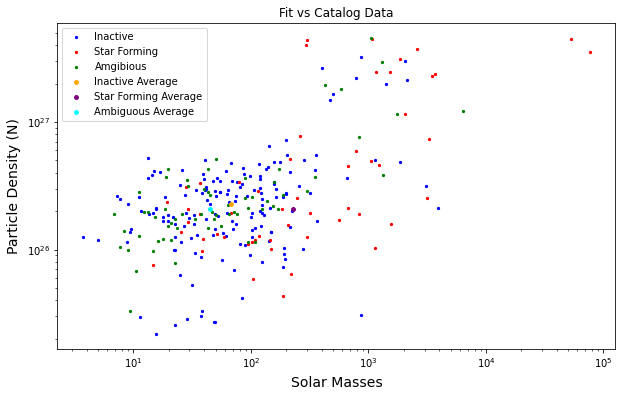

In [113]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))
ax.scatter(MASS_0, NL_0, color='blue', label = 'Inactive', s=5)
ax.scatter(MASS_1, NL_1, color='red', label = 'Star Forming', s=5)
ax.scatter(MASS_2, NL_2, color='green', label = 'Amgibious', s=5)

ax.scatter(np.median(MASS_0), Avg_CSL0, color='orange', s=15, label = 'Inactive Average')
ax.scatter(np.median(MASS_1), Avg_CSL1, color='purple', s=15, label = 'Star Forming Average' )
ax.scatter(np.median(MASS_2), Avg_CSL2, color='cyan', s=15, label = 'Ambiguous Average')

#ax.axline((0, 0), slope=1)
#MT = plt.scatter(t['Mid Temp'], ABBA, color='purple', label = 'Mid Temp Fit', s=5, marker = 'x')
#HD = plt.scatter(ABBA, ABBA, color='red', label = 'Herschel Column', s=10, marker = '*')
#ax.set_xlim(0, 40)
#ax.set_ylim(1, 10000)
ax.set_xlabel('Solar Masses', labelpad=6, fontsize=14)
ax.set_ylabel('Particle Density (N)', labelpad=6, fontsize=14)
plt.yscale('log')
plt.xscale('log')
ax.set_title('Fit vs Catalog Data')
#plt.figure(figsize = (10,6))
plt.legend()
plt.plot()

In [4]:
git remote add origin https://github.com/Xavier-Braun/IGNITES.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (2488218422.py, line 1)